<font color="#CA3532"><h1 align="left">**Práctica 2 de Aprendizaje por Refuerzo**</h1></font>
<font color="#6E6E6E"><h2 align="left">**Multiarmed Bandits**</h2></font>

# **Multiarmed bandits para Credit Scoring**

El objetivo es construir un sistema automático de aprendizaje por refuerzo para gestionar un sistema de concesión de créditos.
La idea es que cuando un cliente contacte con el banco para solicitar un crédito, el sistema se lo conceda (acción 1) o no (acción 0).
Por tanto el sistema de aprendizaje por refuerzo tiene **dos posibles acciones**.

Por otra parte, el reward obtenido es:

- 0 si el sistema decide no ofrecerle el crédito al cliente
- 1 si se le ofrece el crédito y **lo paga**
- -10 si se le ofrece crédito y **no lo paga**

Para construir el sistema disponemos del siguiente dataset: https://drive.google.com/file/d/1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR/view?usp=sharing


A continuación se descarga y muestra:

In [ ]:
COLAB = True

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 200

# Descargamos dataset:
aux = "'https://docs.google.com/uc?export=download&id=1000WA5q8DTZ68uoPaXddJ1TLJPBsIZpr&confirm=t'"
!wget -q $aux -O ./cs.csv
aux = "'https://docs.google.com/uc?export=download&id=11SdrmYpGwW7xC6Nooe6aRBkORBnirrkm&confirm=t'"
!wget -q $aux -O ./DataDictionary.csv

**Información sobre cada variable:**

In [ ]:
info_variables = pd.read_csv("DataDictionary.csv", sep=";").set_index("Variable Name")
info_variables

,Unnamed: 0,Description,Type
Variable Name,,,
SeriousDlqin2yrs,0,Person experienced 90 days past due delinquency or worse,Y/N
RevolvingUtilizationOfUnsecuredLines,1,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
age,2,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,3,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
DebtRatio,4,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
MonthlyIncome,5,Monthly income,real
NumberOfOpenCreditLinesAndLoans,6,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
NumberOfTimes90DaysLate,7,Number of times borrower has been 90 days or more past due.,integer
NumberRealEstateLoansOrLines,8,Number of mortgage and real estate loans including home equity lines of credit,integer


**Base de datos:**

In [ ]:
df = pd.read_csv("./cs.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [ ]:
df.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
SeriousDlqin2yrs,150000.0,0.0,1.0,0.066840,0.249746
RevolvingUtilizationOfUnsecuredLines,150000.0,0.0,50708.0,6.048438,249.755371
age,150000.0,0.0,109.0,52.295207,14.771866
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.0,98.0,0.421033,4.192781
DebtRatio,150000.0,0.0,329664.0,353.005076,2037.818523
MonthlyIncome,120269.0,0.0,3008750.0,6670.221237,14384.674215
NumberOfOpenCreditLinesAndLoans,150000.0,0.0,58.0,8.452760,5.145951
NumberOfTimes90DaysLate,150000.0,0.0,98.0,0.265973,4.169304
NumberRealEstateLoansOrLines,150000.0,0.0,54.0,1.018240,1.129771
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.0,98.0,0.240387,4.155179


In [ ]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
(df["MonthlyIncome"].isna() & df["NumberOfDependents"].isna()).sum()

3924

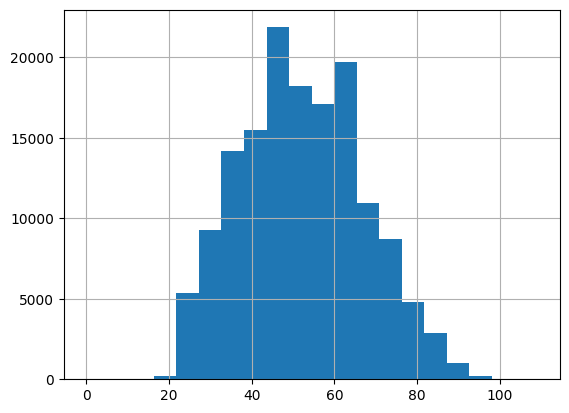

In [ ]:
df["age"].hist(bins=20);

In [ ]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [ ]:
# limpieza básica:
#
# 1- Eliminamos filas con missing values (MonthlyIncome y NumberOfDependents)
# 2- Nos quedamos solo con personas de 18 a 70 años (incluidos)
# 3- Eliminamos filas que tengan 96 o 98 en columnas de retraso
#    (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse,
#     NumberOfTimes90DaysLate)

df.dropna(inplace=True)
df = df[ (df["age"]>=18) & (df["age"]<=70) ]

df = df[ ~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTimes90DaysLate"].isin([96, 98]) ]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,107883.0,0.073728,0.261329,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,107883.0,6.262285,268.425237,0.0,0.042982,0.206481,0.617870,50708.0
age,107883.0,48.343835,11.909195,21.0,39.000000,49.000000,58.000000,70.0
NumberOfTime30-59DaysPastDueNotWorse,107883.0,0.276781,0.739606,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,107883.0,27.426863,395.986811,0.0,0.162018,0.308917,0.493251,60212.0
MonthlyIncome,107883.0,6800.816625,14941.921271,0.0,3500.000000,5500.000000,8344.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,107883.0,8.774265,5.155074,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,107883.0,0.098588,0.509666,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,107883.0,1.095233,1.157615,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,107883.0,0.072106,0.348840,0.0,0.000000,0.000000,0.000000,11.0


La columna **SeriousDlqin2yrs** es 0 si el cliente paga el crédito, y 1 si no lo paga.

Ahora dividimos el dataset en training y test:

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

In [ ]:
# frecuencia de impagos en training y test (en tanto por 1):
df_train["SeriousDlqin2yrs"].mean(), df_test["SeriousDlqin2yrs"].mean()

(0.07373076617495167, 0.073721612853391)

In [ ]:
# Defino clase clientes:

class clientes:
    def __init__(self, df): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return -10
        return 1 # paga

In [ ]:
# clientes: una clase
# cl_train: una instancia de esa clase
# cl_test: otra instancia de esa clase
#
# podemos ver cl_train como una "caja" donde hemos
# metido el dataset de entrenamiento y va a haber
# métodos que me permiten interaccionar con él
#
# Lo mismo con cl_test, pero para los datos de test

cl_train = clientes(df_train)
cl_test  = clientes(df_test)

In [ ]:
cl_train.cliente() # simulo que llega un cliente nuevo

In [ ]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        0.064833
age                                        59.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.156957
MonthlyIncome                           16666.000000
NumberOfOpenCreditLinesAndLoans             5.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 135262, dtype: float64

In [ ]:
cl_train.get_context().values

array([6.48325870e-02, 5.90000000e+01, 0.00000000e+00, 1.56956861e-01,
       1.66660000e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00])

In [ ]:
cl_train.cliente()
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines       0.209079
age                                       30.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.129946
MonthlyIncome                           2400.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14308, dtype: float64

In [ ]:
cl_train.get_reward(1)

1

# **Tareas a realizar**

1- Calcula la evolución del reward total y regret total en training de:
 a) un algoritmo aleatorio
 b) un algoritmo que siempre da el crédito
 c) un algoritmo que nunca da el crédito

 Calcula en otra gráfica la evolución de su reward promedio y regret promedio. ¿Tienen sentido los resultados?

2- Entrena un multiarmed bandit **no contextual** en training. Calcula las mismas métricas que en el punto 1. ¿Cuál es la estrategia que aprende el modelo?

3- Entrena un multiarmed bandit contextual lineal en training. Calcula las mismas métricas que en los puntos anteriores

4- Calcula, para algunos clientes de training, las Q dadas por el modelo para cada acción. Chequea si obtienes los mismos valores calculándolos tú. Chequea si la acción elegida por el modelo es la de mayor Q.

5- Calcula en test el rendimiento del algoritmo de multiarmed bandit. Compáralo con el grupo de control de test (reserva un 10% de clientes en test como grupo de control).

6- Obtén la interpretabilidad del modelo. ¿En qué variables se está fijando para decidir?

7- Qué ocurre en los puntos anteriores si ahora la penalización cuando el banco da un crédito a un cliente que no paga es -1? ¿Y si se va haciendo aún más pequeña la penalización?

8- Optimiza tu sistema haciendo selección de variables.

9- (Opcional). Investiga otras librerías que permitan implementar multiarmed bandits contextuales no lineales. Toma una de ellas y vuelve a realizar la tarea 3.
https://github.com/alison-carrera/onn

### Tarea 1

**Calcula la evolución del reward total y regret total en training de: a) un algoritmo aleatorio b) un algoritmo que siempre da el crédito c) un algoritmo que nunca da el crédito**

**Calcula en otra gráfica la evolución de su reward promedio y regret promedio. ¿Tienen sentido los resultados?**

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.metrics import accuracy_score

In [ ]:
# Función para calcular el reward y el regret
def calcular_reward_regret(cliente, accion):
    reward = cliente.get_reward(accion)
    regret = max(cliente.get_reward(1), cliente.get_reward(0)) - reward
    return reward, regret

# Función para simular la interacción con clientes y calcular el reward total y regret total
def simular_interaccion(clientes, algoritmo, num_iteraciones):
    np.random.seed(1000)
    rewards_totales = []
    regrets_totales = []

    for _ in range(num_iteraciones):
        clientes.cliente()
        contexto = clientes.get_context()
        accion = algoritmo(contexto)
        reward, regret = calcular_reward_regret(clientes, accion)
        rewards_totales.append(reward)
        regrets_totales.append(regret)

    return rewards_totales, regrets_totales

# Algoritmo aleatorio: selecciona aleatoriamente una acción
def algoritmo_aleatorio(contexto):
    return np.random.choice([0, 1])

# Algoritmo que siempre da el crédito (acción 1)
def siempre_dar_credito(contexto):
    return 1

# Algoritmo que nunca da el crédito (acción 0)
def nunca_dar_credito(contexto):
    return 0

def calcular_promedios_acumulados(rewards_totales, regrets_totales):
    reward_promedio_acumulado = np.cumsum(rewards_totales) / np.arange(1, len(rewards_totales) + 1)
    regret_promedio_acumulado = np.cumsum(regrets_totales) / np.arange(1, len(regrets_totales) + 1)
    return reward_promedio_acumulado, regret_promedio_acumulado

def graficar_evolucion_reward_regret(reward_data, regret_data, labels):
    plt.figure(figsize=(12, 6))

    # Reward promedio
    plt.subplot(1, 2, 1)
    for i in range(len(reward_data)):
        plt.plot(reward_data[i], label=labels[i])
    plt.title('Evolución del Reward Promedio')
    plt.xlabel("Iteracion")
    plt.ylabel("'Reward Promedio'")
    plt.legend()
    plt.grid()

    # Regret promedio
    plt.subplot(1, 2, 2)
    for i in range(len(regret_data)):
        plt.plot(regret_data[i], label=labels[i])
    plt.title('Evolución del Regret Promedio')
    plt.xlabel("Iteracion")
    plt.ylabel("Regret Promedio")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [ ]:
num_iteraciones = len(df_train)

In [ ]:
# Para el algoritmo aleatorio
rewards_aleatorio, regrets_aleatorio = simular_interaccion(cl_train, algoritmo_aleatorio, num_iteraciones)

# Para el algoritmo que siempre da el crédito
rewards_dar_credito, regrets_dar_credito = simular_interaccion(cl_train, siempre_dar_credito, num_iteraciones)

# Para el algoritmo que nunca da el crédito
rewards_no_dar_credito, regrets_no_dar_credito = simular_interaccion(cl_train, nunca_dar_credito, num_iteraciones)

# Mostrar los resultados
print("Reward total y regret total para el algoritmo aleatorio:")
print("Reward total:", rewards_aleatorio[-1])
print("Regret total:", regrets_aleatorio[-1])
print("--------------------------------------------")
print("Reward total y regret total para el algoritmo que siempre da el crédito:")
print("Reward total:", rewards_dar_credito[-1])
print("Regret total:", regrets_dar_credito[-1])
print("--------------------------------------------")
print("Reward total y regret total para el algoritmo que nunca da el crédito:")
print("Reward total:", rewards_no_dar_credito[-1])
print("Regret total:", regrets_no_dar_credito[-1])

Reward total y regret total para el algoritmo aleatorio:
Reward total: 0
Regret total: 1
--------------------------------------------
Reward total y regret total para el algoritmo que siempre da el crédito:
Reward total: 1
Regret total: 0
--------------------------------------------
Reward total y regret total para el algoritmo que nunca da el crédito:
Reward total: 0
Regret total: 1


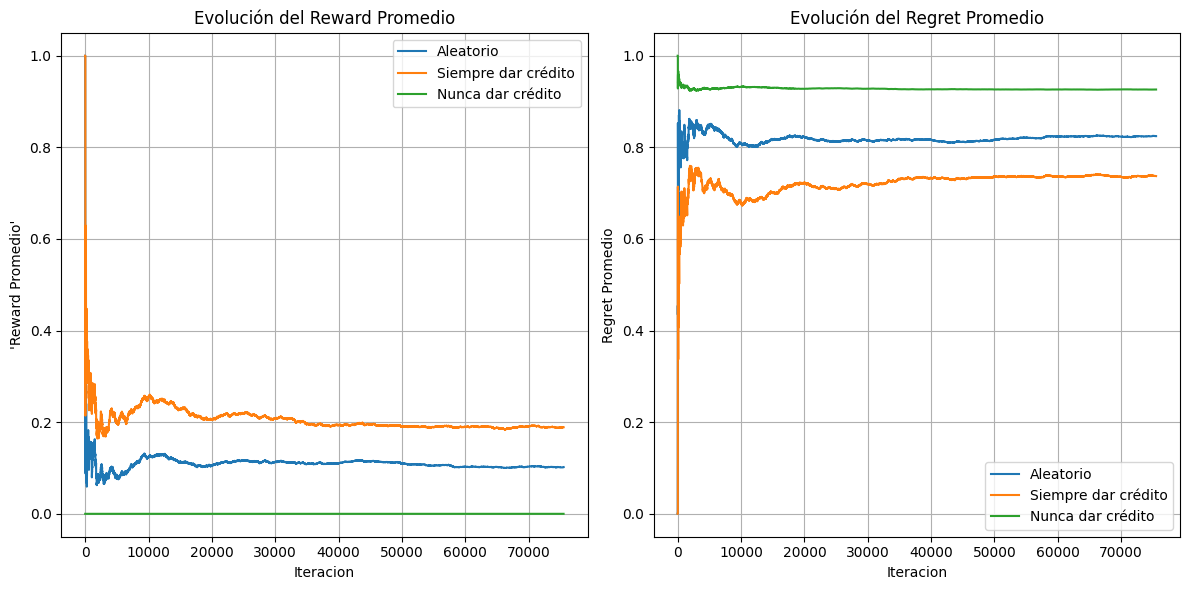

In [ ]:
# Calcular promedios para cada algoritmo
reward_promedio_aleatorio, regret_promedio_aleatorio = calcular_promedios_acumulados(rewards_aleatorio, regrets_aleatorio)
reward_promedio_dar_credito, regret_promedio_dar_credito = calcular_promedios_acumulados(rewards_dar_credito, regrets_dar_credito)
reward_promedio_no_dar_credito, regret_promedio_no_dar_credito = calcular_promedios_acumulados(rewards_no_dar_credito, regrets_no_dar_credito)

rewards_aux_norm = [reward_promedio_aleatorio,reward_promedio_dar_credito,reward_promedio_no_dar_credito]
regrets_aux_norm = [regret_promedio_aleatorio,regret_promedio_dar_credito,regret_promedio_no_dar_credito]
labels = ["Aleatorio", "Siempre dar crédito", "Nunca dar crédito"]

graficar_evolucion_reward_regret(rewards_aux_norm, regrets_aux_norm, labels)

**Sin normalizar**


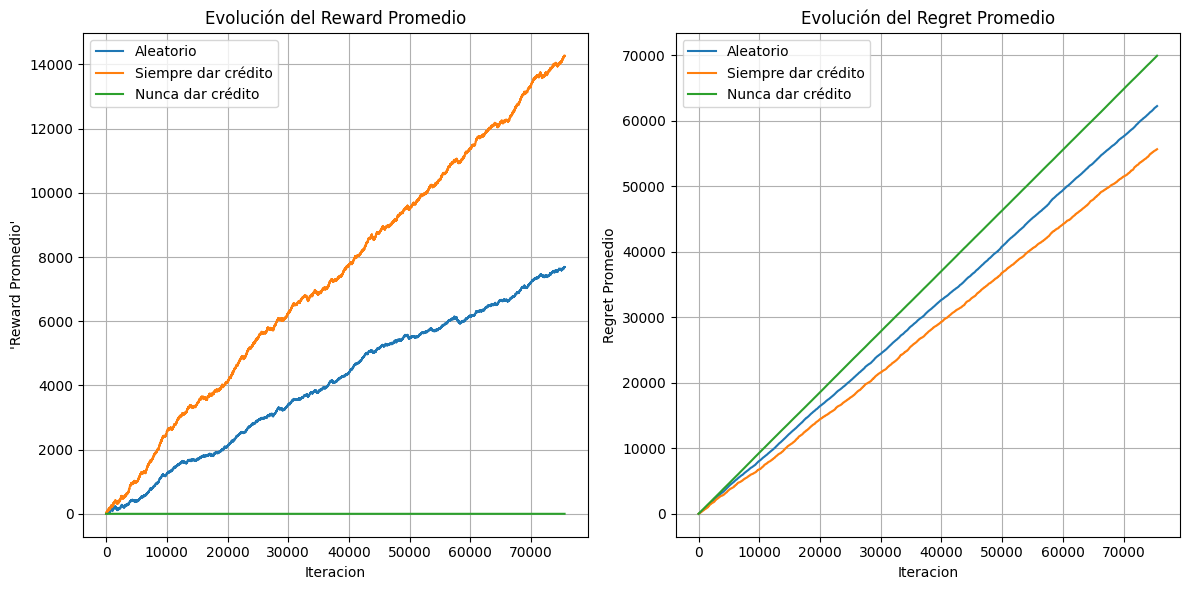

In [ ]:
reward_promedio_aleatorio = np.cumsum(rewards_aleatorio)
regret_promedio_aleatorio = np.cumsum(regrets_aleatorio)

reward_promedio_dar_credito = np.cumsum(rewards_dar_credito)
regret_promedio_dar_credito = np.cumsum(regrets_dar_credito)

reward_promedio_no_dar_credito = np.cumsum(rewards_no_dar_credito)
regret_promedio_no_dar_credito = np.cumsum(regrets_no_dar_credito)

rewards_aux_no_norm = [reward_promedio_aleatorio,reward_promedio_dar_credito,reward_promedio_no_dar_credito]
regrets_aux_no_norm = [regret_promedio_aleatorio,regret_promedio_dar_credito,regret_promedio_no_dar_credito]
labels = ["Aleatorio", "Siempre dar crédito", "Nunca dar crédito"]

graficar_evolucion_reward_regret(rewards_aux_no_norm, regrets_aux_no_norm, labels)

**Contestar a las preguntas**
Respecto a la pregunta ¿Tienen sentido los resultados? Los resultados si tienen sentido, ya que si nunca da credito nunca perdera pero tampoco podra ganar dinero y sus ganancias de dinero siempre sera 0. Respecto a dar credito de forma aleatoria o siempre darla, tiene sentido que el que de siempre de prestamo gane más dinero que el de forma aleatoria, ya que tendrá más gente que le devuelva el prestamo y por ende ganar mas ganancias, suponiendo que tengan una proporcion similar de gente que devuelve el prestamo frente a los que no. Pero tambien podria pasar al reves y ganar más dinero el que da prestamos de forma aleatoria, ya que podría dar prestamos justo a cualquiera de los que tienen una ingreso mensual y no a ninguno de los dos de la tabla que se ve con head(10) o a cualquier otro que no tenga ingresos (y por ende no tan probable que devuelvan el prestamo), pero siendo esto mas improbable que darle de forma aleatoria y que al final de a alguien que no tenga ingresos. Por lo que acaba siendo razonable los resultados ya que nadie asegura que de forma aleatoria coja la misma proporcion de gente que devuelve y no devuelve los prestamos, eso junto a que al haber menos cantidad de gente que devuelva los prestamos y aunque haya menos gente que no lo devuelva tambien, en una tasa de la misma proporcion acaba ganando menos dinero el que lo haga de forma aleatoria al haber una cantidad menor de ganancias generales, siendo mayor solo (o mayoritariamente cuando escoge de forma aleatoria a todos los que devuelven el prestamo y ninguno de los que no lo debuelven).

Dicho lo anterior sobre las ganancias, tiene sentido sus graficas y regret obtenido, ya que a mayor ganancia menor regret.


### Tarea 2

**Entrena un multiarmed bandit no contextual en training. Calcula las mismas métricas que en el punto 1. ¿Cuál es la estrategia que aprende el modelo?**

Para entrenar un multiarmed bandit no contextual, podemos utilizar un enfoque de bandit epsilon-greedy. Este enfoque implica que, con una probabilidad 1 - $\epsilon$, el modelo seleccionará la acción con la mayor recompensa promedio observada hasta el momento, y con una probabilidad ε, seleccionará una acción al azar. Esto permite explorar diferentes acciones mientras se explota la acción actualmente considerada óptima.

In [ ]:
# Función para seleccionar la acción según la estrategia epsilon-greedy
def epsilon_greedy(epsilon, counts, values):
    # Seleccionar una acción al azar con probabilidad epsilon
    if np.random.random() < epsilon:
        return np.random.choice(len(values))
    else:
        # Seleccionar la acción con el mayor valor estimado
        return np.argmax(values)

def entrenar_multiarmed_bandit_no_cont(clientes, epsilon, num_iteraciones):
    np.random.seed(1000)
    counts = np.zeros(2)  # Contador de veces que se selecciona cada acción
    values = np.zeros(2)  # Valor estimado de cada acción (recompensa promedio)
    rewards_totales = []
    regrets_totales = []

    for _ in range(num_iteraciones):
        accion = epsilon_greedy(epsilon, counts, values)
        counts[accion] += 1
        clientes.cliente()
        reward, regret = calcular_reward_regret(clientes, accion)
        rewards_totales.append(reward)
        regrets_totales.append(regret)
        # Actualizar el valor estimado de la acción seleccionada (promedio de rewards)
        values[accion] += (reward - values[accion]) / counts[accion]

    return rewards_totales, regrets_totales

In [ ]:
# Definir el valor de epsilon para el enfoque epsilon-greedy
epsilon = 0.1

rewards_bandit, regrets_bandit = entrenar_multiarmed_bandit_no_cont(cl_train, epsilon, num_iteraciones)
reward_promedio_bandit, regret_promedio_bandit = calcular_promedios_acumulados(rewards_bandit, regrets_bandit)

Normalizado

In [ ]:
rewards_aux_norm.append(reward_promedio_bandit)
regrets_aux_norm.append(regret_promedio_bandit)
labels.append("MultiArmed Bandit no contextual")

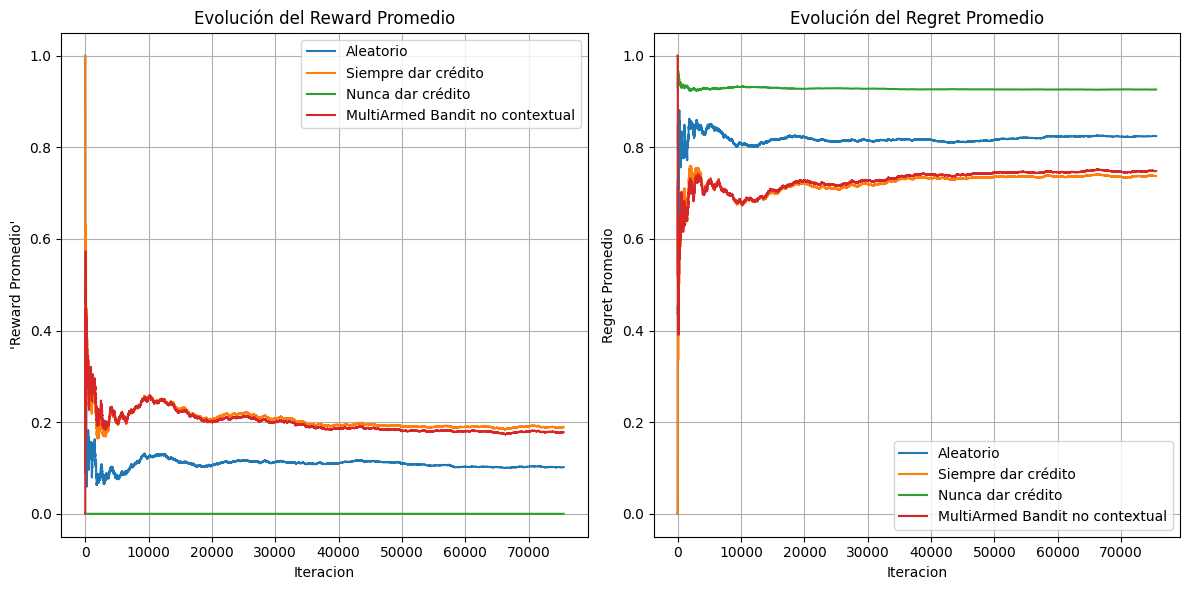

In [ ]:
graficar_evolucion_reward_regret(rewards_aux_norm, regrets_aux_norm, labels)

Sin normalizar:

In [ ]:
rewards_aux_no_norm.append(np.cumsum(rewards_bandit))
regrets_aux_no_norm.append(np.cumsum(regrets_bandit))

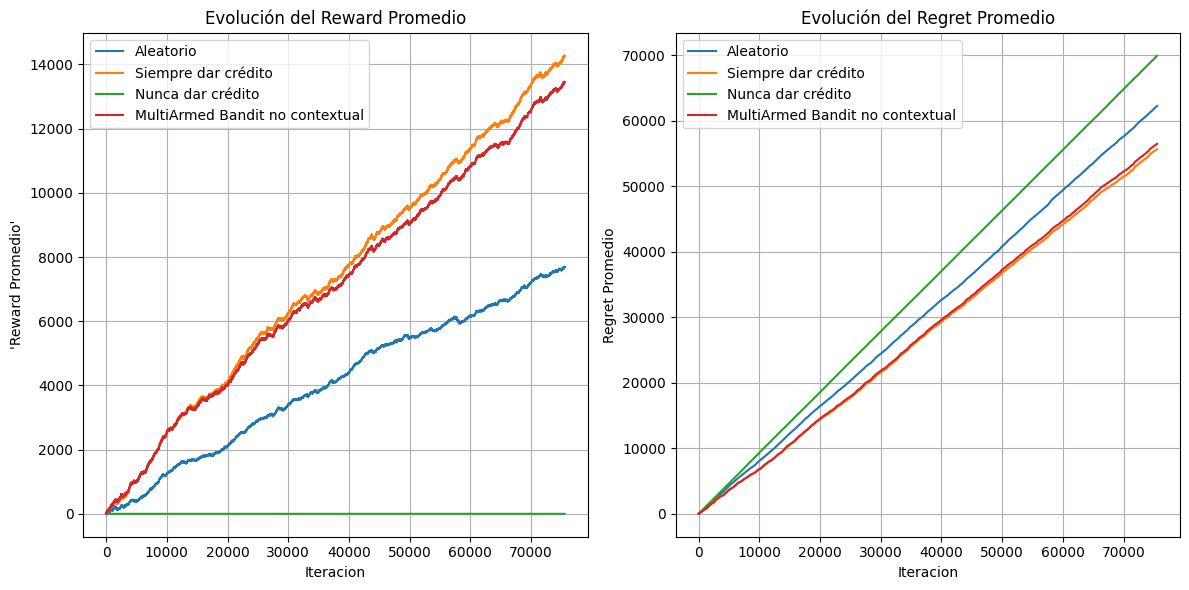

In [ ]:
graficar_evolucion_reward_regret(rewards_aux_no_norm, regrets_aux_no_norm, labels)

La estrategia óptima sería seleccionar la acción que maximice el reward promedio a medida que avanza el entrenamiento. En este caso, siendo $ϵ$ igual a 0.1, el modelo aprende la estrategia de dar siempre crédito, ya que son practicamente iguales, quitando que gana menos el modelo no contextual debido a La exploracion donde habra tenido ganancias de 0 al no haber dado el crédito. o al haber probado de forma aleatoria a dar el crédito donde gana de media menos que al dar siempre el crédito. Se ejecuta varias veces, donde en este caso se aprecia que el MultiArmed Bandit puede empezar siendo aleatorio porque empieza teniendo ganancias parecidas al de dar siempre crédito, junto a que como se empieza en un sitio y se decide de forma aleatoria si explorar o no, pero según van creciendo las diferencias de cuanto se gana (reward) y el regret en cada modelo, el MultiArmed Bandit empieza a actuar como el modelo de dar siempre crédito. Esto pasa como se esperaria, ya que como a la larga da siempre crédito da más reward y menos regret pues acabaria convergiendo a este, y la unica duda sería si empieza como el modelo de dar siempre crédito o darlo de forma aleatoria, ya que al principio son iguales, pero se suele escoger siempre dar crédito ya que relativamente pronto empieza ya a conseguir mejores reward y regret.

### Tarea 3

**Entrena un multiarmed bandit contextual lineal en training. Calcula las mismas métricas que en los puntos anteriores**

In [ ]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd

    gdd.download_file_from_google_drive(file_id='1fCnGzS5U_x-k_03op_XJkHVS4jpvjSxS',
                                        dest_path='./spacebandits.zip', unzip=True)

In [ ]:
from space_bandits import LinearBandits

Instructions for updating:
non-resource variables are not supported in the long term


Explica el mótivo debido a la eliminación de los warning por el os.forks

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Función para simular la interacción con clientes y entrenar el multiarmed bandit contextual lineal
def entrenar_multiarmed_bandit_contextual(clientes, num_iteraciones, bandits_model):
    np.random.seed(1000)
    rewards_totales = []
    regrets_totales = []

    for _ in range(num_iteraciones):
        clientes.cliente()  # Simular la llegada de un nuevo cliente
        contexto = clientes.get_context().values  # Obtener el contexto del cliente

        # Seleccionar acción utilizando el modelo de bandits
        accion = bandits_model.action(contexto)

        reward, regret = calcular_reward_regret(clientes, accion)  # Calcular reward y regret
        rewards_totales.append(reward)  # Registrar el reward
        regrets_totales.append(regret)  # Registrar el regret
        # Actualizar el modelo del multiarmed bandit con el contexto y la acción seleccionada
        bandits_model.update(contexto, accion, reward)

    return rewards_totales, regrets_totales

In [ ]:
# Definir el número de acciones en el multiarmed bandit
num_actions = 2

# Crear una instancia de LinearBandits
bandits_model = LinearBandits(num_actions=num_actions, num_features=10)

# Entrenar el multiarmed bandit contextual lineal
rewards_contextual_bandit, regrets_contextual_bandit = entrenar_multiarmed_bandit_contextual(cl_train, num_iteraciones, bandits_model)
reward_promedio_contextual_bandit, regret_promedio_contextual_bandit = calcular_promedios_acumulados(rewards_contextual_bandit, regrets_contextual_bandit)

Normalizado:

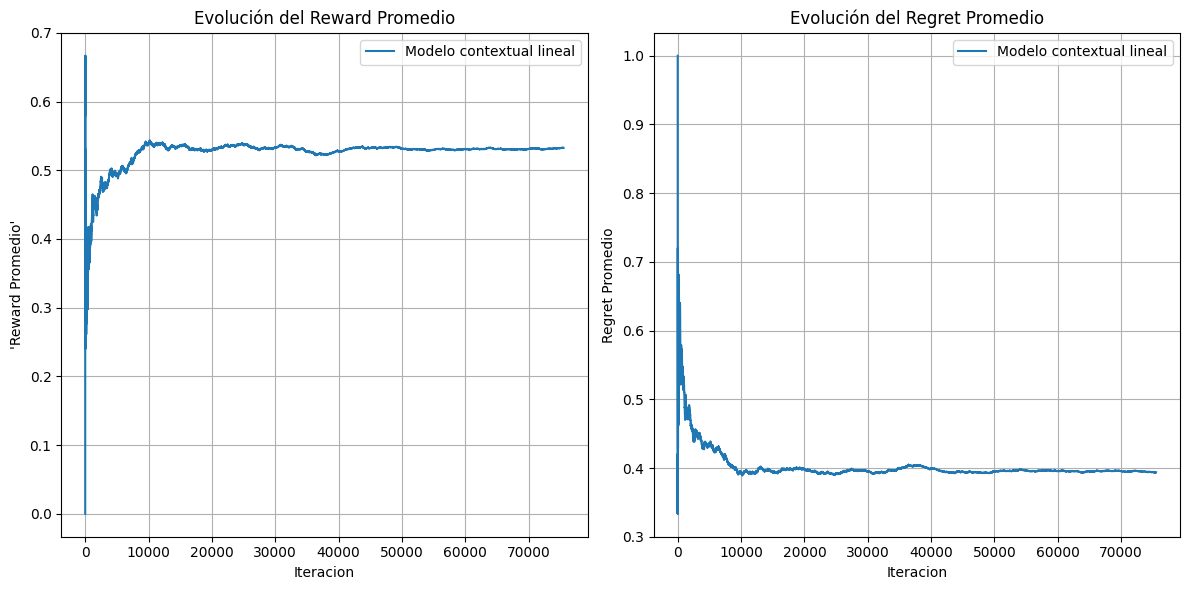

In [ ]:
graficar_evolucion_reward_regret([reward_promedio_contextual_bandit], [regret_promedio_contextual_bandit], ["Modelo contextual lineal"])

In [ ]:
rewards_aux_norm.append(reward_promedio_contextual_bandit)
regrets_aux_norm.append(regret_promedio_contextual_bandit)
labels.append("MultiArmed Bandit lineal contextual")

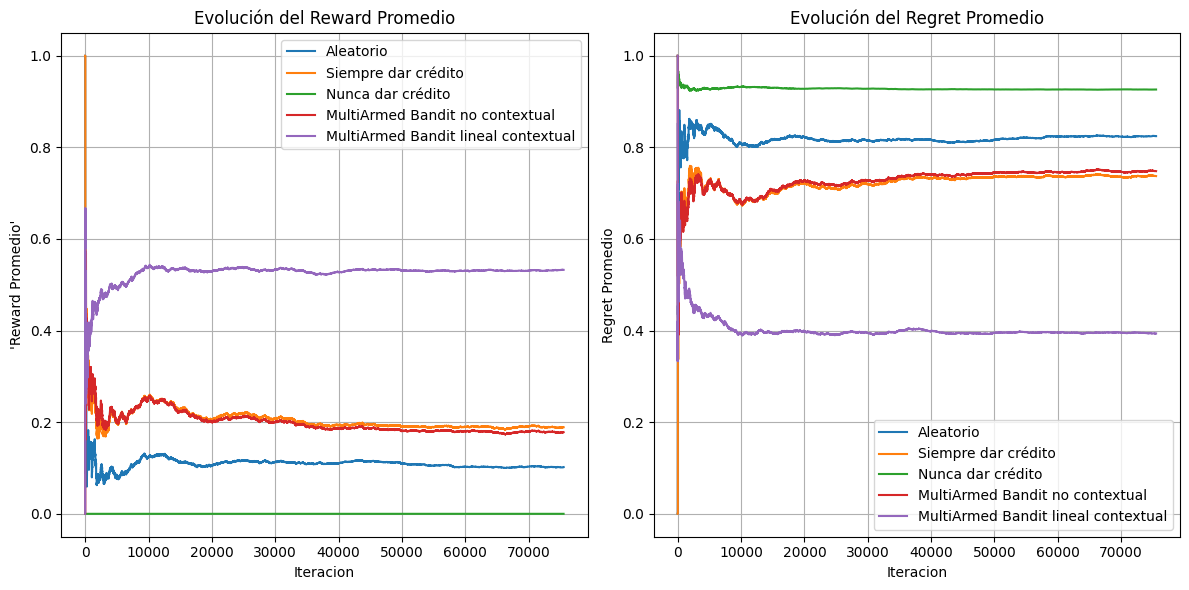

In [ ]:
graficar_evolucion_reward_regret(rewards_aux_norm, regrets_aux_norm, labels)

Sin normalizar:

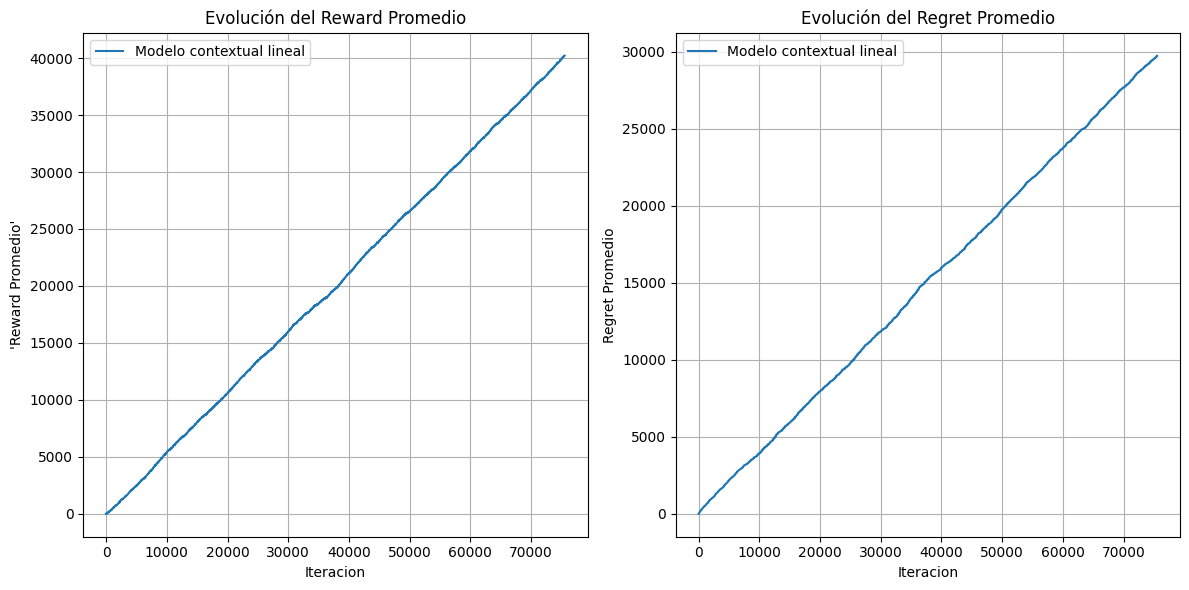

In [ ]:
graficar_evolucion_reward_regret([np.cumsum(rewards_contextual_bandit)], [np.cumsum(regrets_contextual_bandit)], ["Modelo contextual lineal"])

In [ ]:
rewards_aux_no_norm.append(np.cumsum(rewards_contextual_bandit))
regrets_aux_no_norm.append(np.cumsum(regrets_contextual_bandit))

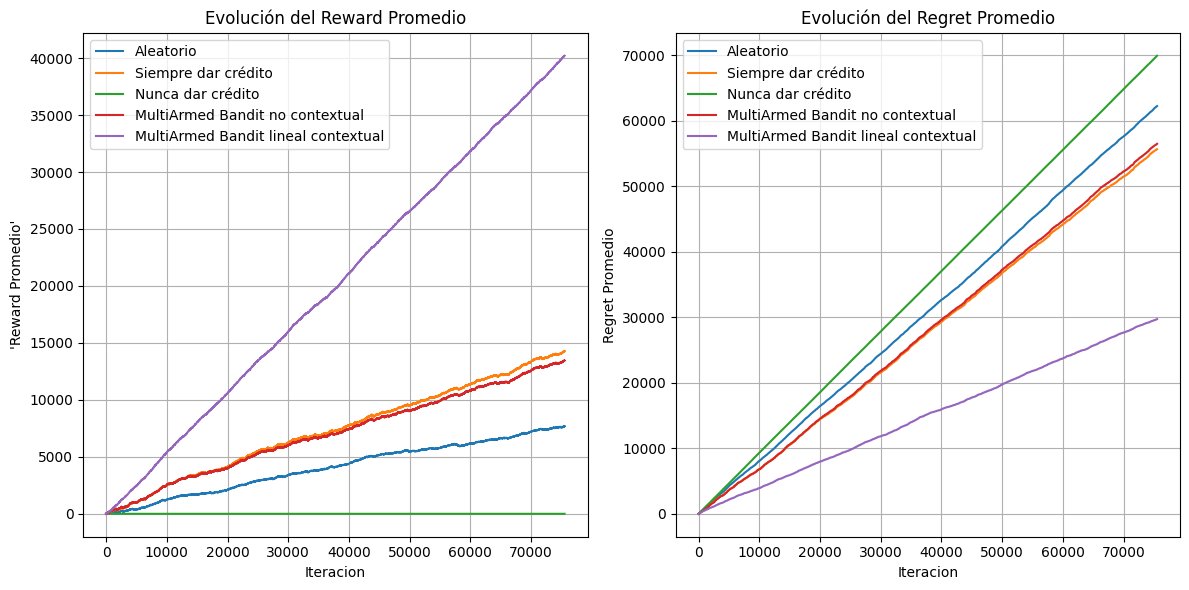

In [ ]:
graficar_evolucion_reward_regret(rewards_aux_no_norm, regrets_aux_no_norm, labels)

Comparado con el uso de los anteriores algoritmos, se observa que utilizando un Multiarmed Bandit Contextual Lineal se obtiene una gran mejora tanto en la evolución del reward promedio (aumentando) y del regret promedio (disminuyendo). También se produce un aumento en el coste computacional muy alto respecto al resto de métodos debido a la mayor complejidad del modelo.

El enfoque de Multiarmed Bandit Contextual Lineal tiene la capacidad de aprovechar la información contextual para tomar decisiones más informadas. Al considerar las características del contexto, puede adaptarse mejor a las condiciones cambiantes del entorno y seleccionar las acciones óptimas de manera más precisa.

Y la capacidad de personalizar la política de selección de acciones en función del contexto puede llevar a una mejor exploración y explotación de las opciones disponibles. Esto significa que el algoritmo puede explorar nuevas acciones en contextos desconocidos mientras explota acciones conocidas en contextos familiares, lo que conduce a una mejor convergencia hacia las acciones óptimas.

### Tarea 4

**Calcula, para algunos clientes de training, las Q dadas por el modelo para cada acción.**

 Para que no sea una elección arbitraria utilizando un modelo nuevo, porque los valores promedios serían igual a 0 por lo que las dos acciones tendrían las mismas opciones de ser elegidos. Por lo que se utiliza el modelo utilizado en el apartado anterior, que tendrá los valores de mu ya actualizados.

 mu (valores promedios por variable) nos da una idea de cómo cada característica del cliente influye en la decisión de dar crédito o no, basándose en lo que ha aprendido el modelo de los datos observados hasta ahora. Es como una especie de "opinión media" sobre cómo deberías tomar decisiones basadas en las características del cliente.

In [ ]:
np.random.seed(1000)
# Seleccionar algunos clientes de entrenamiento
num_clientes_evaluacion = 5
indices_clientes = np.random.choice(len(df_train), num_clientes_evaluacion, replace=False)
clientes_evaluacion = df_train.iloc[indices_clientes]

valores_q = []
valor_final = []

# Calcular las estimaciones de Q proporcionadas por el modelo para cada cliente
for i, cliente in clientes_evaluacion.iterrows():
    contexto_cliente = cliente.drop("SeriousDlqin2yrs").values

    Q_modelo = bandits_model.predict(contexto_cliente)
    valor_final.append(Q_modelo)

    q_valor = bandits_model.expected_values(contexto_cliente)
    valores_q.append(q_valor)

    print(f"Cliente {i}:")
    if Q_modelo == 1:
      print("Estimaciones de Q del modelo:", Q_modelo, "con valor:", q_valor[1])
    else: print("Estimaciones de Q del modelo:", Q_modelo, "con valor:", q_valor[0])
    print()

Cliente 89766:
Estimaciones de Q del modelo: [1] con valor: 0.699473339942866

Cliente 49147:
Estimaciones de Q del modelo: [1] con valor: 0.724678884324961

Cliente 50609:
Estimaciones de Q del modelo: [1] con valor: 0.5763596646237188

Cliente 60016:
Estimaciones de Q del modelo: [0] con valor: 0.0

Cliente 64318:
Estimaciones de Q del modelo: [1] con valor: 0.6710882765977139



**Chequea si obtienes los mismos valores calculándolos tú.**

Se utilizan los valores de mu entrenados del modelo del apartado anterior y se ira calculando a partir de ellos los diferentes valores de Q. La formula que se sigue para calcular la recompensa esperada para cada acción es la siguiente:

$\mu_i*x^T + \mu_{i,bias}$ donde el primer $\mu_i$ representa los coeficientes de regresión, x el vector de características y el  $\mu_{i,bias}$ que sería el intercepto.

In [ ]:
valores_q_manuales = []

for i, cliente in clientes_evaluacion.iterrows():
    contexto_cliente = cliente.drop("SeriousDlqin2yrs").values

    q_valor_manual = [np.dot(bandits_model.mu[i][:-1],contexto_cliente.T) + bandits_model.mu[i][-1]
                      for i in range(2)]
    valores_q_manuales.append(q_valor_manual)

    Q_modelo_manual = np.argmax(q_valor_manual, axis=0)
    valores_q.append(q_valor)

    print(f"Cliente {i}:")
    if Q_modelo_manual == 1:
      print("Estimaciones de Q del modelo:", Q_modelo_manual, "con valor:", q_valor_manual[1])
    else: print("Estimaciones de Q del modelo:", Q_modelo_manual, "con valor:", q_valor_manual[0])
    print()

Cliente 89766:
Estimaciones de Q del modelo: 1 con valor: 0.699473339942866

Cliente 49147:
Estimaciones de Q del modelo: 1 con valor: 0.724678884324961

Cliente 50609:
Estimaciones de Q del modelo: 1 con valor: 0.5763596646237188

Cliente 60016:
Estimaciones de Q del modelo: 0 con valor: 0.0

Cliente 64318:
Estimaciones de Q del modelo: 1 con valor: 0.6710882765977139



In [ ]:
coinciden = True

for i, (q_valor_manual, q_valor_modelo) in enumerate(zip(valores_q_manuales, valores_q)):
    # Compara los índices de las acciones seleccionadas manualmente con las seleccionadas por el modelo
    accion_manual = np.argmax(q_valor_manual)
    accion_modelo = np.argmax(q_valor_modelo)
    if accion_manual != accion_modelo:
      coinciden = False

if coinciden:
  print("La acciones seleccionadas manualmente y por el modelo coinciden")
else: print("La acciones seleccionadas manualmente y por el modelo no coinciden")

La acciones seleccionadas manualmente y por el modelo coinciden


Los resultados que se obtienen son los mismos calculados manualmente igual que a través del modelo.

**Chequea si la acción elegida por el modelo es la de mayor Q.**

In [ ]:
for (i, _) , valores_q_aux, valor_final_aux in zip(clientes_evaluacion.iterrows(),
                                                valores_q,valor_final):
    print(f"Cliente {i}:")
    print("Estimaciones de Q:", valores_q_aux, "con acción elegida con valor:",valor_final_aux )

Cliente 89766:
Estimaciones de Q: [0.         0.69947334] con acción elegida con valor: [1]
Cliente 49147:
Estimaciones de Q: [0.         0.72467888] con acción elegida con valor: [1]
Cliente 50609:
Estimaciones de Q: [0.         0.57635966] con acción elegida con valor: [1]
Cliente 60016:
Estimaciones de Q: [ 0.         -0.60762105] con acción elegida con valor: [0]
Cliente 64318:
Estimaciones de Q: [0.         0.67108828] con acción elegida con valor: [1]


Con esto se comprueba que siempre se elige el valor máximo en el modelo con los casos que se han utilizado.

### Tarea 5

**Calcula en test el rendimiento del algoritmo de multiarmed bandit. Compáralo con el grupo de control de test (reserva un 10% de clientes en test como grupo de control).**

In [ ]:
def simular_test(clientes, num_iteraciones):
    np.random.seed(1000)
    regrets_totales = []
    rewards_totales = []
    contextos = np.zeros((num_iteraciones,10))

    for i in range(num_iteraciones):
        clientes.cliente()
        contextos[i] = clientes.get_context().values

    acciones = bandits_model.predict(contextos)
    clientes.i = -1

    for accion in acciones:
        clientes.cliente()
        reward, regret = calcular_reward_regret(clientes,accion)

        regrets_totales.append(regret)
        rewards_totales.append(reward)

    return rewards_totales,regrets_totales

In [ ]:
df_test_mb, df_test_control = train_test_split(df_test, test_size=0.1, random_state=42)

cl_test_mb = clientes(df_test_mb)
cl_control = clientes(df_test_control)

rewards, regrets = simular_test(cl_test_mb, len(df_test_mb))

Normalizado:

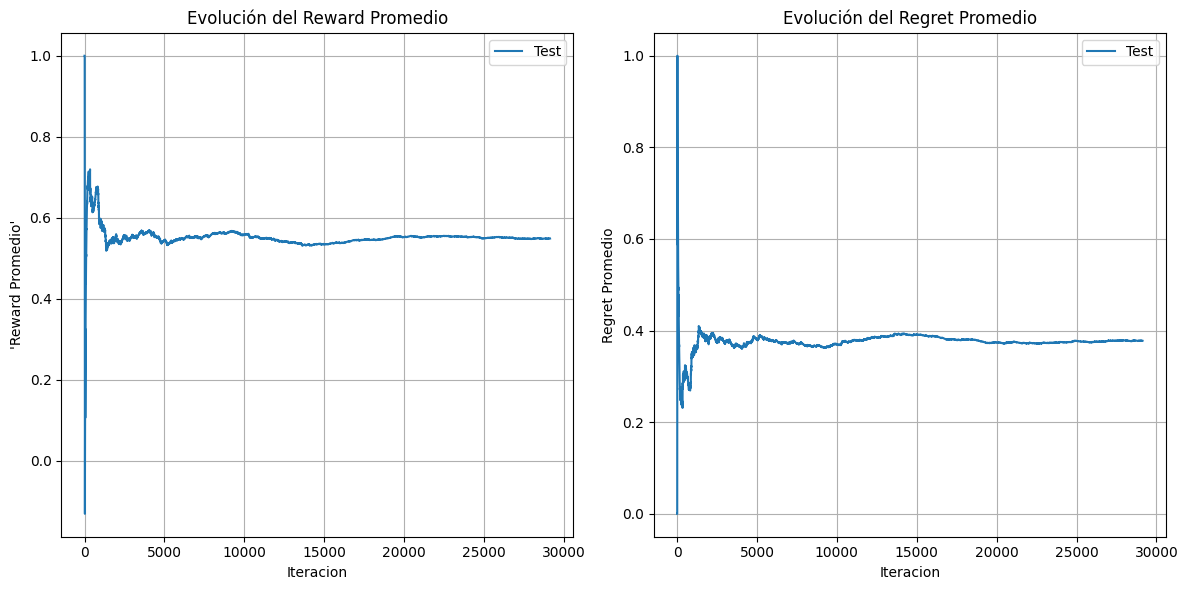

In [ ]:
rewards_acum, regrets_acum = calcular_promedios_acumulados(rewards, regrets)
graficar_evolucion_reward_regret([rewards_acum], [regrets_acum], ["Test"])

Sin normalizar:

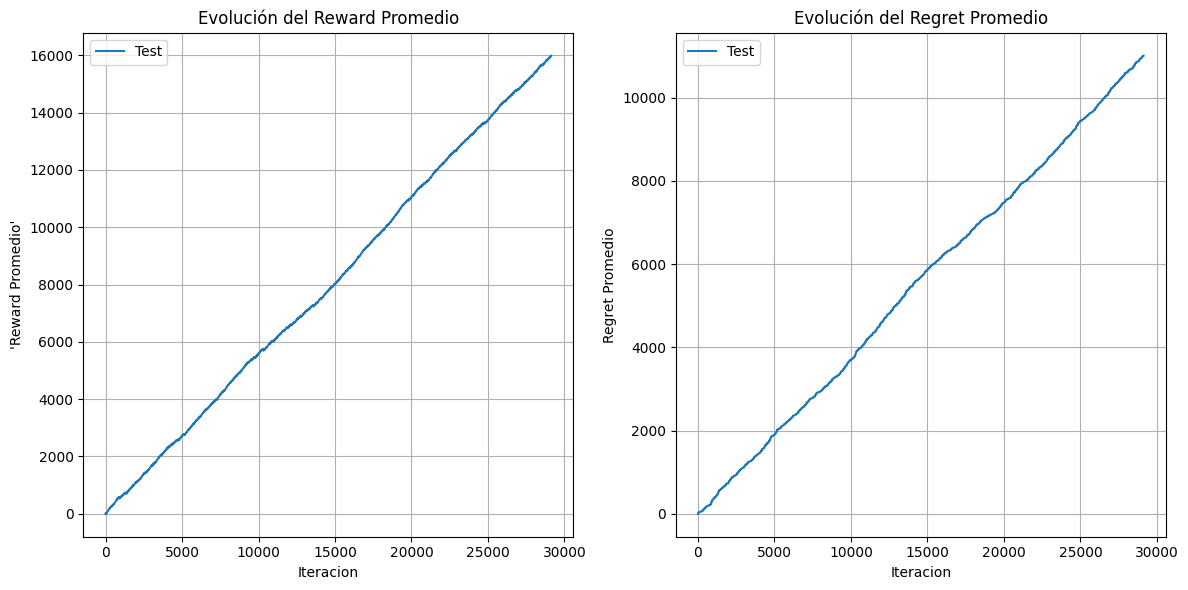

In [ ]:
graficar_evolucion_reward_regret([np.cumsum(rewards)], [np.cumsum(regrets)], ["Test"])

La evolución del promedio tanto del regret y promedio al evaluar el modelo, se observan que son los mejores resultados obtenidos por el momento. Con un valor medio alto para el reward y un valor medio bajo para el regret promedio. Con el uso de otros modelos y más complejos que el lineal puede suponer unos resultados mucho mejores, pero con este modelo se obtienen unos resultados decentes.

Al grupo de control se le aplica una poltica de acción aleatoria y se realiza una comparación.

In [ ]:
np.random.seed(1000)
regrets_control_totales = []
rewards_control_totales = []

for _ in range(len(df_test_control)):
    cl_control.cliente()
    accion_control = np.random.choice([0, 1])  # Acción aleatoria

    reward_control, regret_control = calcular_reward_regret(cl_control,accion_control)

    rewards_control_totales.append(reward_control)
    regrets_control_totales.append(regret_control)

rewards_control_accum, regrets_control_accum = \
calcular_promedios_acumulados(rewards_control_totales, regrets_control_totales)

Normalizado:

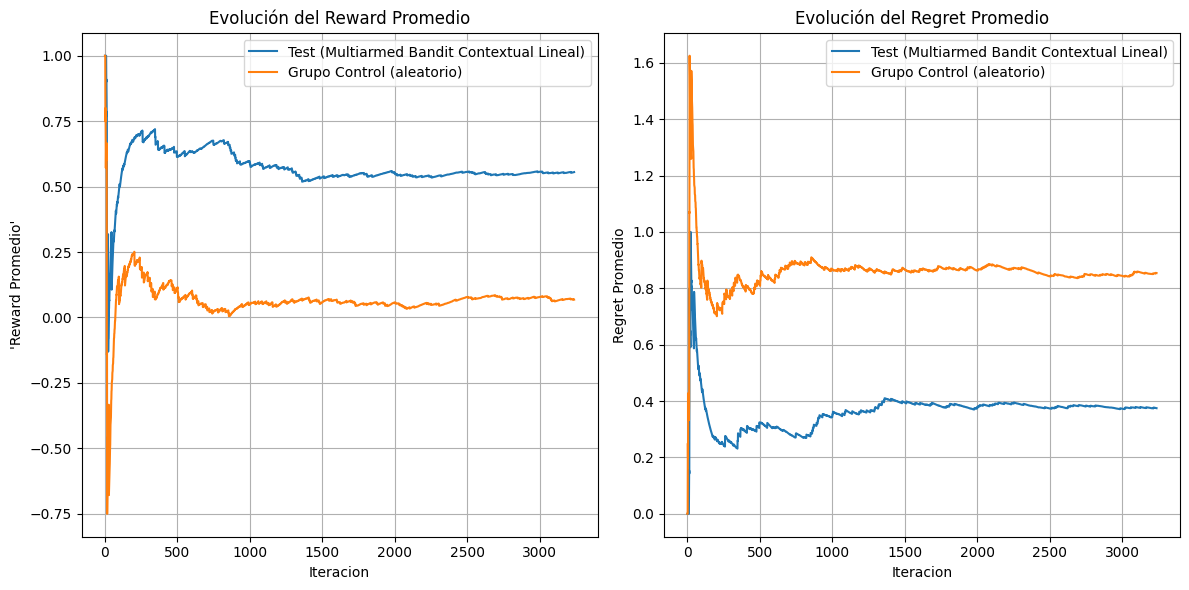

In [ ]:
reward_comp = [rewards_acum[:len(df_test_control)],rewards_control_accum[:len(df_test_control)]]
regret_comp = [regrets_acum[:len(df_test_control)], regrets_control_accum[:len(df_test_control)]]
labels_comp = ["Test (Multiarmed Bandit Contextual Lineal)","Grupo Control (aleatorio)"]
graficar_evolucion_reward_regret(reward_comp, regret_comp, labels_comp)

Sin normalizar:

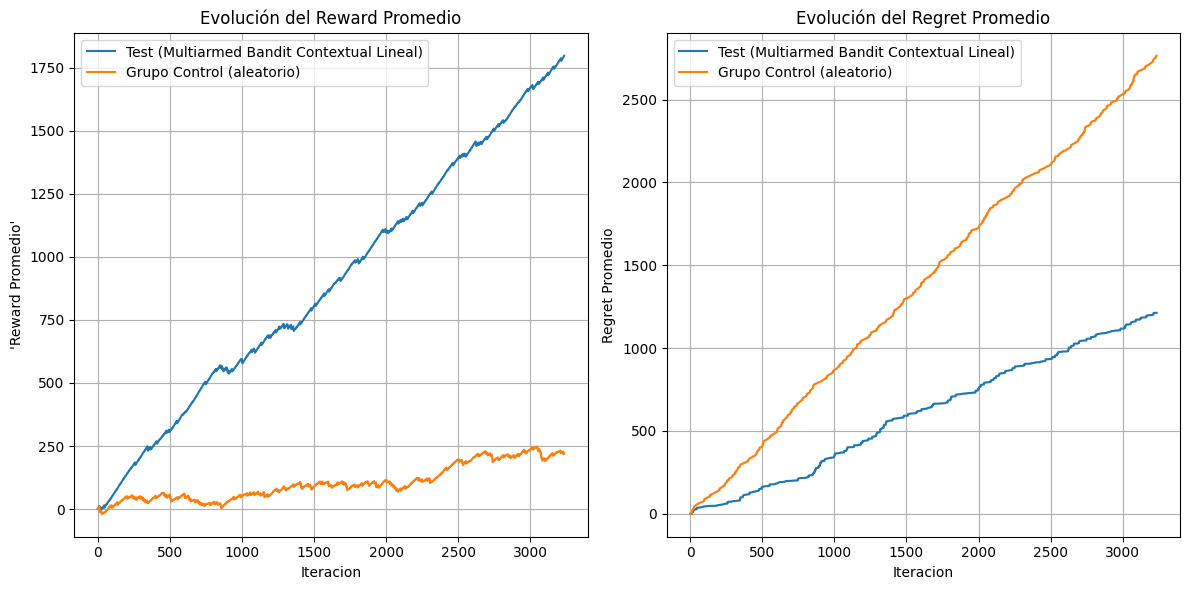

In [ ]:
reward_comp_no_norm = [np.cumsum(rewards[:len(df_test_control)]), np.cumsum(rewards_control_totales[:len(df_test_control)])]
regret_comp_no_norm = [np.cumsum(regrets[:len(df_test_control)]), np.cumsum(regrets_control_totales[:len(df_test_control)])]
labels_comp_no_norm = ["Test (Multiarmed Bandit Contextual Lineal)","Grupo Control (aleatorio)"]
graficar_evolucion_reward_regret(reward_comp_no_norm, regret_comp_no_norm, labels_comp_no_norm)

Con estos dos gráficos se observa la gran mejora que se obtiene comparada con un grupo de control evaluado con el algoritmo aleatorio usado en la primera tarea.

### Tarea 6
**Obtén la interpretabilidad del modelo. ¿En qué variables se está fijando para decidir?**

Accuracy en conjunto de entrenamiento: 0.9262692338250483
Accuracy en conjunto de prueba: 0.926278387146609


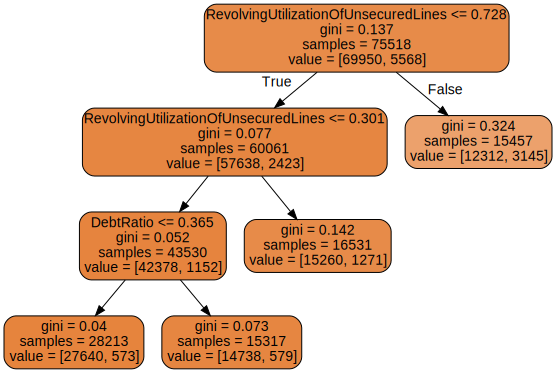

Recomendación para cliente de entrenamiento: 0
Recomendación para cliente de prueba: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Entrenar el árbol de decisión
clf = DecisionTreeClassifier(min_samples_split=0.3, min_samples_leaf=0.2, max_leaf_nodes=5)
clf.fit(df_train.drop("SeriousDlqin2yrs", axis=1), df_train["SeriousDlqin2yrs"])

# Validación del modelo
y_pred_train = clf.predict(df_train.drop("SeriousDlqin2yrs", axis=1))
y_pred_test = clf.predict(df_test.drop("SeriousDlqin2yrs", axis=1))

accuracy_train = accuracy_score(df_train["SeriousDlqin2yrs"], y_pred_train)
accuracy_test = accuracy_score(df_test["SeriousDlqin2yrs"], y_pred_test)

print("Accuracy en conjunto de entrenamiento:", accuracy_train)
print("Accuracy en conjunto de prueba:", accuracy_test)

# Interpretación del árbol de decisión
attributes_names = df.columns[1:]  # Excluir la columna SeriousDlqin2yrs
display(Source(export_graphviz(clf, out_file=None, feature_names=attributes_names, filled=True, rounded=True)))

# Función para obtener las recomendaciones del árbol de decisión
def get_recommendations(client):
    context = client.get_context().values.reshape(1, -1)
    action = clf.predict(context)[0]
    return action

# Ejemplo de uso para obtener la recomendación para un cliente de entrenamiento
cl_train.cliente()  # Simular llegada de cliente
recommendation_train = get_recommendations(cl_train)
print("Recomendación para cliente de entrenamiento:", recommendation_train)

# Ejemplo de uso para obtener la recomendación para un cliente de prueba
cl_test.cliente()  # Simular llegada de cliente
recommendation_test = get_recommendations(cl_test)
print("Recomendación para cliente de prueba:", recommendation_test)


Para interpretar las decisiones tomadas por el modelo de árbol de decisión, se puede observar el árbol generado y analizar las condiciones en cada nodo para entender qué variables se están utilizando para tomar decisiones. Una descripción de cómo interpretar el árbol de decisión es la siguiente:

  1. Nodos Internos: Cada nodo interno representa una decisión basada en una característica específica del conjunto de datos.

  2. Ramificaciones: Las ramificaciones desde cada nodo interno representan las opciones disponibles para esa característica. Por ejemplo, en el nodo RevolvingUtilizationOfUnsecuredLines <= 0.728, hay dos ramas: una para cuando la condición es verdadera y otra para cuando es falsa.

  3. Condiciones de División: La condición en cada nodo indica cómo se divide el conjunto de datos en subconjuntos más pequeños. Por ejemplo, RevolvingUtilizationOfUnsecuredLines <= 0.728 indica que el conjunto de datos se divide en dos grupos según si el valor de la característica RevolvingUtilizationOfUnsecuredLines es menor o igual a 0.728.

  4. Valores de Gini: El valor de Gini en cada nodo proporciona una medida de la impureza del nodo. Un valor de Gini más bajo indica una mayor pureza en la clasificación de las muestras en ese nodo.

  5. Muestras y Valores: La línea samples = ... value = [...] indica el número de muestras en ese nodo y la distribución de clases en esas muestras.

Para decidir, el modelo se fija en las condiciones establecidas en cada nodo y sigue las ramificaciones hasta llegar a un nodo terminal (hoja), donde toma una decisión basada en la mayoría de las muestras en ese nodo.

En resumen, el árbol de decisión utiliza las características del conjunto de datos para dividirlo en subconjuntos más pequeños y, finalmente, tomar decisiones basadas en la distribución de clases en esos subconjuntos. Las variables utilizadas para decidir se encuentran en las condiciones de división en cada nodo del árbol.

### Tarea 7
**Qué ocurre en los puntos anteriores si ahora la penalización cuando el banco da un crédito a un cliente que no paga es -1? ¿Y si se va haciendo aún más pequeña la penalización?**

Lo primero será hacer una modificación en la clase clientes. La modificación realizada es la de modificar la función `get_reward()` añadiendo un parámetro que será la penalización obtenida en el caso de no pagar.

In [ ]:
class clientes_mod:
    def __init__(self, df): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, accion, penalizacion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return penalizacion
        return 1 # paga


In [ ]:
# Función para calcular el reward y el regret
def calcular_reward_regret_mod(cliente, accion, penalizacion):
    reward = cliente.get_reward(accion, penalizacion)
    regret = max(cliente.get_reward(1, penalizacion), cliente.get_reward(0, penalizacion)) - reward
    return reward, regret

# Función para simular la interacción con clientes y calcular el reward total y regret total
def simular_interaccion_mod(clientes, algoritmo, num_iteraciones, penalizacion):
    np.random.seed(1000)
    rewards_totales = []
    regrets_totales = []

    for _ in range(num_iteraciones):
        clientes.cliente()
        contexto = clientes.get_context()
        accion = algoritmo(contexto)
        reward, regret = calcular_reward_regret_mod(clientes, accion, penalizacion)
        rewards_totales.append(reward)
        regrets_totales.append(regret)

    return rewards_totales, regrets_totales

# Algoritmo aleatorio: selecciona aleatoriamente una acción
def algoritmo_aleatorio(contexto):
    return np.random.choice([0, 1])

# Algoritmo que siempre da el crédito (acción 1)
def siempre_dar_credito(contexto):
    return 1

# Algoritmo que nunca da el crédito (acción 0)
def nunca_dar_credito(contexto):
    return 0

def calcular_promedios_acumulados(rewards_totales, regrets_totales):
    reward_promedio_acumulado = np.cumsum(rewards_totales) / np.arange(1, len(rewards_totales) + 1)
    regret_promedio_acumulado = np.cumsum(regrets_totales) / np.arange(1, len(regrets_totales) + 1)
    return reward_promedio_acumulado, regret_promedio_acumulado

def graficar_evolucion_reward_regret(reward_data, regret_data, labels):
    plt.figure(figsize=(12, 6))

    # Reward promedio
    plt.subplot(1, 2, 1)
    for i in range(len(reward_data)):
        plt.plot(reward_data[i], label=labels[i])
    plt.title('Evolución del Reward Promedio')
    plt.xlabel("Iteracion")
    plt.ylabel("'Reward Promedio'")
    plt.legend()
    plt.grid()

    # Regret promedio
    plt.subplot(1, 2, 2)
    for i in range(len(regret_data)):
        plt.plot(regret_data[i], label=labels[i])
    plt.title('Evolución del Regret Promedio')
    plt.xlabel("Iteracion")
    plt.ylabel("Regret Promedio")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

Ahora que tenemos definida una variación de la clase `clientes`, vamos a realizar las mismas comprobaciones que en los apartados anteriores.

In [ ]:
cl_train_mod = clientes_mod(df_train)
cl_test_mod  = clientes_mod(df_test)

In [ ]:
num_iteraciones = len(df_train)

In [ ]:
# Valor de la penalización en caso de no pagar
penalizacion = -1

# Para el algoritmo aleatorio
rewards_aleatorio_mod, regrets_aleatorio_mod = simular_interaccion_mod(cl_train_mod, algoritmo_aleatorio, num_iteraciones, penalizacion)

# Para el algoritmo que siempre da el crédito
rewards_dar_credito_mod, regrets_dar_credito_mod = simular_interaccion_mod(cl_train_mod, siempre_dar_credito, num_iteraciones, penalizacion)

# Para el algoritmo que nunca da el crédito
rewards_no_dar_credito_mod, regrets_no_dar_credito_mod = simular_interaccion_mod(cl_train_mod, nunca_dar_credito, num_iteraciones, penalizacion)

# Mostrar los resultados
print("Reward total y regret total para el algoritmo aleatorio:")
print("Reward total:", rewards_aleatorio[-1])
print("Reward total modificado:\t", rewards_aleatorio_mod[-1])
print("Regret total:", regrets_aleatorio[-1])
print("Regret total modificado:\t", regrets_aleatorio_mod[-1])
print("--------------------------------------------")
print("Reward total y regret total para el algoritmo que siempre da el crédito:")
print("Reward total:", rewards_dar_credito[-1])
print("Reward total modificado:", rewards_dar_credito_mod[-1])
print("Regret total:", regrets_dar_credito[-1])
print("Regret total mmodificado:", regrets_dar_credito_mod[-1])
print("--------------------------------------------")
print("Reward total y regret total para el algoritmo que nunca da el crédito:")
print("Reward total:", rewards_no_dar_credito[-1])
print("Reward total modificado:", rewards_no_dar_credito_mod[-1])
print("Regret total:", regrets_no_dar_credito[-1])
print("Regret total modificado:", regrets_no_dar_credito_mod[-1])

Reward total y regret total para el algoritmo aleatorio:
Reward total: 0
Reward total modificado:	 0
Regret total: 1
Regret total modificado:	 1
--------------------------------------------
Reward total y regret total para el algoritmo que siempre da el crédito:
Reward total: 1
Reward total modificado: 1
Regret total: 0
Regret total mmodificado: 0
--------------------------------------------
Reward total y regret total para el algoritmo que nunca da el crédito:
Reward total: 0
Reward total modificado: 0
Regret total: 1
Regret total modificado: 1


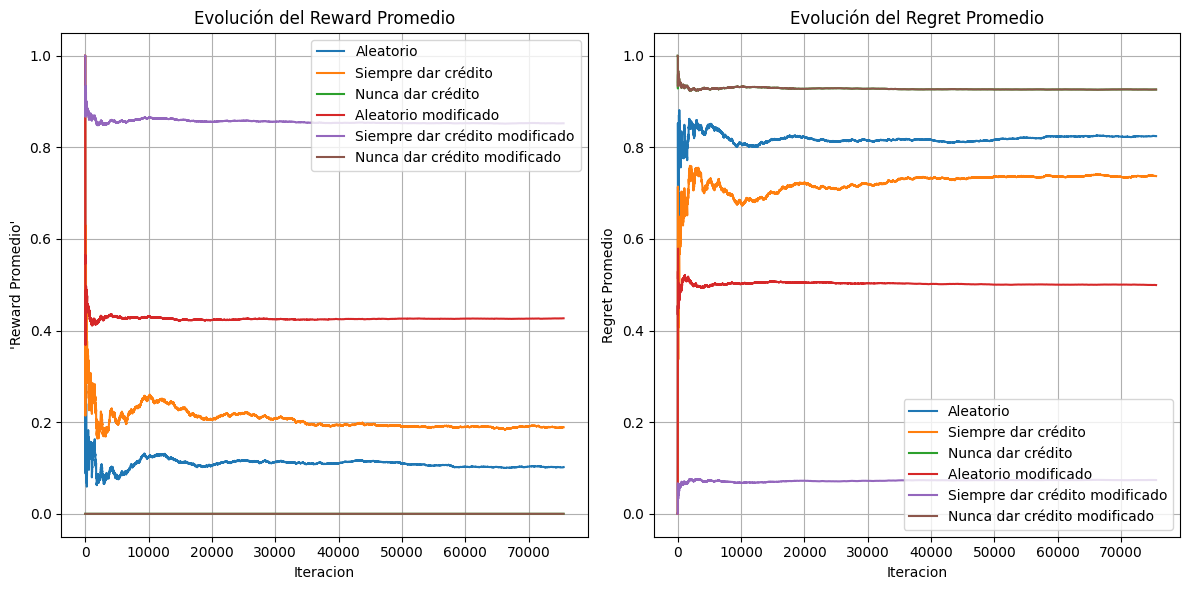

In [ ]:
reward_promedio_aleatorio, regret_promedio_aleatorio = calcular_promedios_acumulados(rewards_aleatorio, regrets_aleatorio)
reward_promedio_dar_credito, regret_promedio_dar_credito = calcular_promedios_acumulados(rewards_dar_credito, regrets_dar_credito)
reward_promedio_no_dar_credito, regret_promedio_no_dar_credito = calcular_promedios_acumulados(rewards_no_dar_credito, regrets_no_dar_credito)

reward_promedio_aleatorio_mod, regret_promedio_aleatorio_mod = calcular_promedios_acumulados(rewards_aleatorio_mod, regrets_aleatorio_mod)
reward_promedio_dar_credito_mod, regret_promedio_dar_credito_mod = calcular_promedios_acumulados(rewards_dar_credito_mod, regrets_dar_credito_mod)
reward_promedio_no_dar_credito_mod, regret_promedio_no_dar_credito_mod = calcular_promedios_acumulados(rewards_no_dar_credito_mod, regrets_no_dar_credito_mod)

rewards_aux_norm = [reward_promedio_aleatorio,reward_promedio_dar_credito,reward_promedio_no_dar_credito, reward_promedio_aleatorio_mod,reward_promedio_dar_credito_mod,reward_promedio_no_dar_credito_mod]
regrets_aux_norm = [regret_promedio_aleatorio,regret_promedio_dar_credito,regret_promedio_no_dar_credito, regret_promedio_aleatorio_mod,regret_promedio_dar_credito_mod,regret_promedio_no_dar_credito_mod]
labels = ["Aleatorio", "Siempre dar crédito", "Nunca dar crédito", "Aleatorio modificado", "Siempre dar crédito modificado", "Nunca dar crédito modificado"]

graficar_evolucion_reward_regret(rewards_aux_norm, regrets_aux_norm, labels)

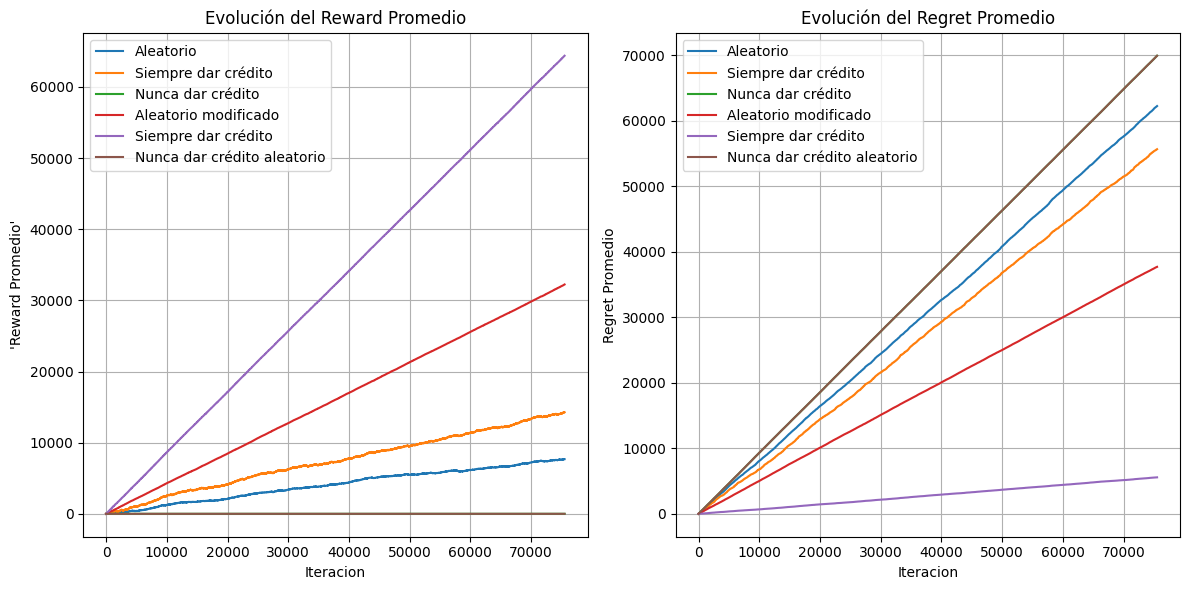

In [ ]:
reward_promedio_aleatorio = np.cumsum(rewards_aleatorio)
regret_promedio_aleatorio = np.cumsum(regrets_aleatorio)

reward_promedio_dar_credito = np.cumsum(rewards_dar_credito)
regret_promedio_dar_credito = np.cumsum(regrets_dar_credito)

reward_promedio_no_dar_credito = np.cumsum(rewards_no_dar_credito)
regret_promedio_no_dar_credito = np.cumsum(regrets_no_dar_credito)

reward_promedio_aleatorio_mod = np.cumsum(rewards_aleatorio_mod)
regret_promedio_aleatorio_mod = np.cumsum(regrets_aleatorio_mod)

reward_promedio_dar_credito_mod = np.cumsum(rewards_dar_credito_mod)
regret_promedio_dar_credito_mod = np.cumsum(regrets_dar_credito_mod)

reward_promedio_no_dar_credito_mod = np.cumsum(rewards_no_dar_credito_mod)
regret_promedio_no_dar_credito_mod = np.cumsum(regrets_no_dar_credito_mod)

rewards_aux_no_norm = [reward_promedio_aleatorio,reward_promedio_dar_credito,reward_promedio_no_dar_credito,reward_promedio_aleatorio_mod,reward_promedio_dar_credito_mod,reward_promedio_no_dar_credito_mod]
regrets_aux_no_norm = [regret_promedio_aleatorio,regret_promedio_dar_credito,regret_promedio_no_dar_credito,regret_promedio_aleatorio_mod,regret_promedio_dar_credito_mod,regret_promedio_no_dar_credito_mod]
labels = ["Aleatorio", "Siempre dar crédito", "Nunca dar crédito", "Aleatorio modificado", "Siempre dar crédito", "Nunca dar crédito aleatorio"]

graficar_evolucion_reward_regret(rewards_aux_no_norm, regrets_aux_no_norm, labels)

Respecto a la pregunta ¿Qué ocurre en los puntos anteriores si ahora la penalización cuando el banco da un crédito a un cliente que no paga es -1? Se puede observar que el regret y reward de no dar nunca crédito siguen siendo iguales sin importar qué penalización conlleve el no pagar. Ahora, podemos observar que el reward de dar un crédito de manera aleatoria es mejor que con una penalización de $-10$. Por lo que puede deducirse que dar un crédito a clientes con una penalización menor sale mejor que dar un crédito a clientes con una penalización mayor.

In [ ]:
cl_train_mod = clientes_mod(df_train)
cl_test_mod  = clientes_mod(df_test)

In [ ]:
# Valor de la penalización en caso de no pagar
penalizacion = -0.01
rewards_aleatorio_mod, regrets_aleatorio_mod = simular_interaccion_mod(cl_train_mod, algoritmo_aleatorio, num_iteraciones, penalizacion)

# Para el algoritmo que siempre da el crédito
rewards_dar_credito_mod, regrets_dar_credito_mod = simular_interaccion_mod(cl_train_mod, siempre_dar_credito, num_iteraciones, penalizacion)

# Para el algoritmo que nunca da el crédito
rewards_no_dar_credito_mod, regrets_no_dar_credito_mod = simular_interaccion_mod(cl_train_mod, nunca_dar_credito, num_iteraciones, penalizacion)

# Mostrar los resultados
print("Reward total y regret total para el algoritmo aleatorio:")
print("Reward total:", rewards_aleatorio[-1])
print("Reward total modificado:\t", rewards_aleatorio_mod[-1])
print("Regret total:", regrets_aleatorio[-1])
print("Regret total modificado:\t", regrets_aleatorio_mod[-1])
print("--------------------------------------------")
print("Reward total y regret total para el algoritmo que siempre da el crédito:")
print("Reward total:", rewards_dar_credito[-1])
print("Reward total modificado:", rewards_dar_credito_mod[-1])
print("Regret total:", regrets_dar_credito[-1])
print("Regret total mmodificado:", regrets_dar_credito_mod[-1])
print("--------------------------------------------")
print("Reward total y regret total para el algoritmo que nunca da el crédito:")
print("Reward total:", rewards_no_dar_credito[-1])
print("Reward total modificado:", rewards_no_dar_credito_mod[-1])
print("Regret total:", regrets_no_dar_credito[-1])
print("Regret total modificado:", regrets_no_dar_credito_mod[-1])

Reward total y regret total para el algoritmo aleatorio:
Reward total: 0
Reward total modificado:	 0
Regret total: 1
Regret total modificado:	 1
--------------------------------------------
Reward total y regret total para el algoritmo que siempre da el crédito:
Reward total: 1
Reward total modificado: 1
Regret total: 0
Regret total mmodificado: 0
--------------------------------------------
Reward total y regret total para el algoritmo que nunca da el crédito:
Reward total: 0
Reward total modificado: 0
Regret total: 1
Regret total modificado: 1


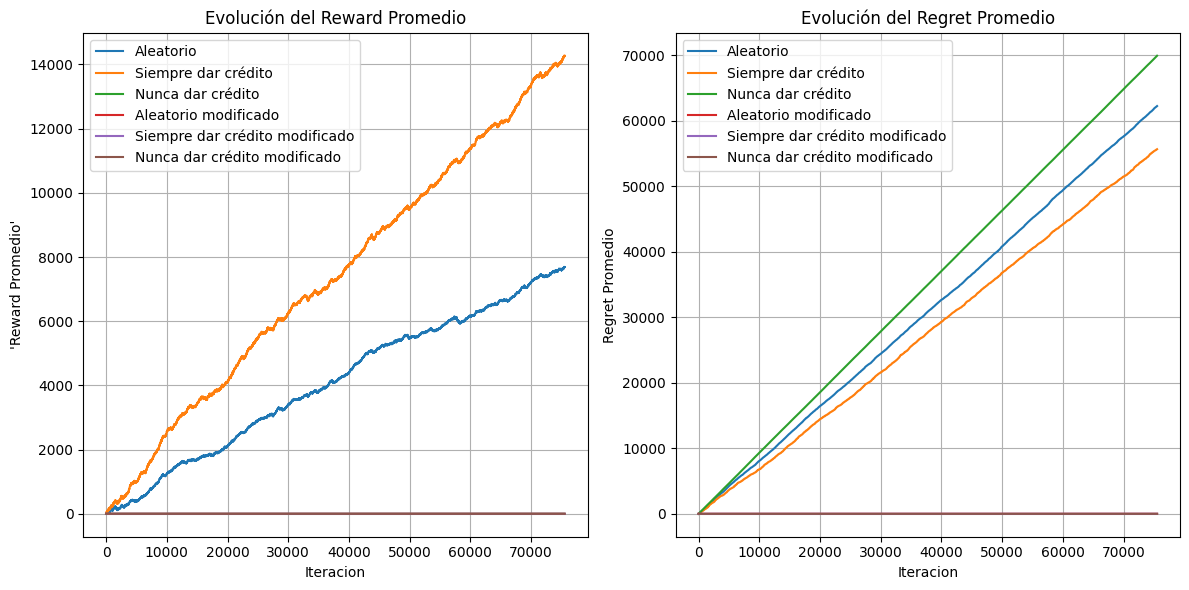

In [ ]:
reward_promedio_aleatorio_mod, regret_promedio_aleatorio_mod = calcular_promedios_acumulados(rewards_aleatorio_mod, regrets_aleatorio_mod)
reward_promedio_dar_credito_mod, regret_promedio_dar_credito_mod = calcular_promedios_acumulados(rewards_dar_credito_mod, regrets_dar_credito_mod)
reward_promedio_no_dar_credito_mod, regret_promedio_no_dar_credito_mod = calcular_promedios_acumulados(rewards_no_dar_credito_mod, regrets_no_dar_credito_mod)

rewards_aux_norm = [reward_promedio_aleatorio,reward_promedio_dar_credito,reward_promedio_no_dar_credito, reward_promedio_aleatorio_mod,reward_promedio_dar_credito_mod,reward_promedio_no_dar_credito_mod]
regrets_aux_norm = [regret_promedio_aleatorio,regret_promedio_dar_credito,regret_promedio_no_dar_credito, regret_promedio_aleatorio_mod,regret_promedio_dar_credito_mod,regret_promedio_no_dar_credito_mod]
labels = ["Aleatorio", "Siempre dar crédito", "Nunca dar crédito", "Aleatorio modificado", "Siempre dar crédito modificado", "Nunca dar crédito modificado"]

graficar_evolucion_reward_regret(rewards_aux_norm, regrets_aux_norm, labels)

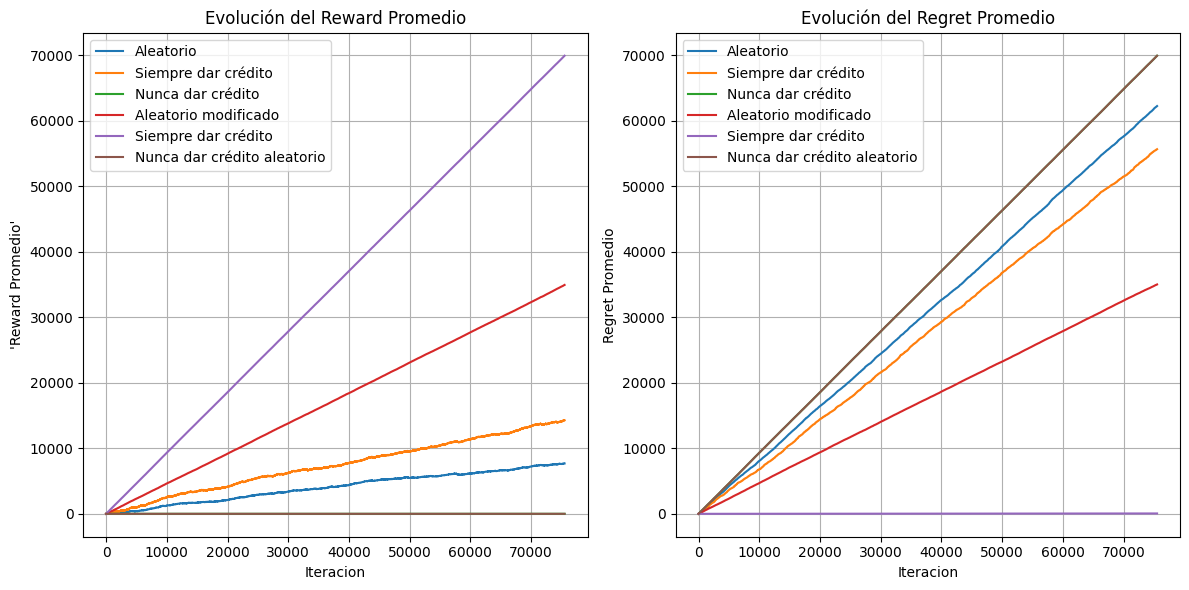

In [ ]:
reward_promedio_aleatorio = np.cumsum(rewards_aleatorio)
regret_promedio_aleatorio = np.cumsum(regrets_aleatorio)

reward_promedio_dar_credito = np.cumsum(rewards_dar_credito)
regret_promedio_dar_credito = np.cumsum(regrets_dar_credito)

reward_promedio_no_dar_credito = np.cumsum(rewards_no_dar_credito)
regret_promedio_no_dar_credito = np.cumsum(regrets_no_dar_credito)

reward_promedio_aleatorio_mod = np.cumsum(rewards_aleatorio_mod)
regret_promedio_aleatorio_mod = np.cumsum(regrets_aleatorio_mod)

reward_promedio_dar_credito_mod = np.cumsum(rewards_dar_credito_mod)
regret_promedio_dar_credito_mod = np.cumsum(regrets_dar_credito_mod)

reward_promedio_no_dar_credito_mod = np.cumsum(rewards_no_dar_credito_mod)
regret_promedio_no_dar_credito_mod = np.cumsum(regrets_no_dar_credito_mod)

rewards_aux_no_norm = [reward_promedio_aleatorio,reward_promedio_dar_credito,reward_promedio_no_dar_credito,reward_promedio_aleatorio_mod,reward_promedio_dar_credito_mod,reward_promedio_no_dar_credito_mod]
regrets_aux_no_norm = [regret_promedio_aleatorio,regret_promedio_dar_credito,regret_promedio_no_dar_credito,regret_promedio_aleatorio_mod,regret_promedio_dar_credito_mod,regret_promedio_no_dar_credito_mod]
labels = ["Aleatorio", "Siempre dar crédito", "Nunca dar crédito", "Aleatorio modificado", "Siempre dar crédito", "Nunca dar crédito aleatorio"]

graficar_evolucion_reward_regret(rewards_aux_no_norm, regrets_aux_no_norm, labels)

Con una penalización mucho menor, se puede observar que dar crédito de manera aleatoria a clientes con aún menor penalización, en este caso de $-0.01$ la recompensa de dar siempre crédito es mejor que si el cliente tiene una penalización de $-10$. Lo que concuerda lo dicho con la penalización de $-1$.

Ahora vamos a comparar con el modelo contextual.

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Función para simular la interacción con clientes y entrenar el multiarmed bandit contextual lineal
def entrenar_multiarmed_bandit_contextual_mod(clientes, num_iteraciones, bandits_model, penalizacion):
    np.random.seed(1000)
    rewards_totales = []
    regrets_totales = []

    for _ in range(num_iteraciones):
        clientes.cliente()  # Simular la llegada de un nuevo cliente
        contexto = clientes.get_context().values  # Obtener el contexto del cliente

        # Seleccionar acción utilizando el modelo de bandits
        accion = bandits_model.action(contexto)

        reward, regret = calcular_reward_regret_mod(clientes, accion, penalizacion)  # Calcular reward y regret
        rewards_totales.append(reward)  # Registrar el reward
        regrets_totales.append(regret)  # Registrar el regret
        # Actualizar el modelo del multiarmed bandit con el contexto y la acción seleccionada
        bandits_model.update(contexto, accion, reward)

    return rewards_totales, regrets_totales

In [ ]:
# Establecemos la penalización
penalizacion = -1

# Definir el número de acciones en el multiarmed bandit
num_actions = 2

# Crear una instancia de LinearBandits
bandits_model = LinearBandits(num_actions=num_actions, num_features=10)

# Entrenar el multiarmed bandit contextual lineal
rewards_contextual_bandit_mod, regrets_contextual_bandit_mod = entrenar_multiarmed_bandit_contextual_mod(cl_train_mod, num_iteraciones, bandits_model, penalizacion)
reward_promedio_contextual_bandit_mod, regret_promedio_contextual_bandit_mod = calcular_promedios_acumulados(rewards_contextual_bandit_mod, regrets_contextual_bandit_mod)

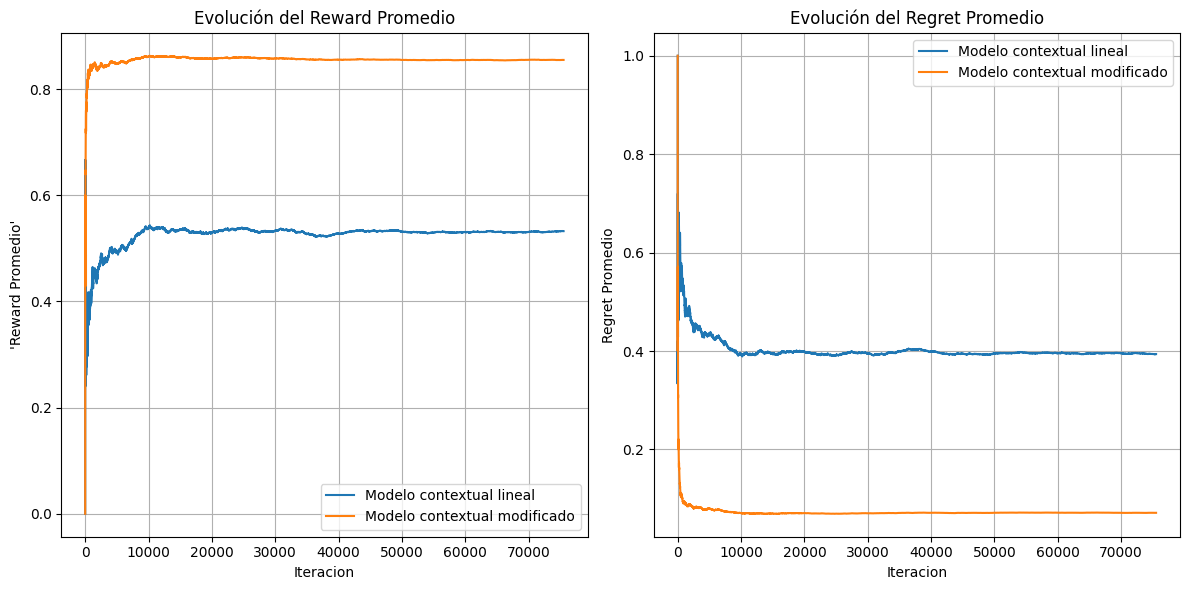

In [ ]:
graficar_evolucion_reward_regret([reward_promedio_contextual_bandit, reward_promedio_contextual_bandit_mod],
                                 [regret_promedio_contextual_bandit, regret_promedio_contextual_bandit_mod], ["Modelo contextual lineal", "Modelo contextual modificado"])

In [ ]:
rewards_aux_norm.append(reward_promedio_contextual_bandit_mod)
regrets_aux_norm.append(regret_promedio_contextual_bandit_mod)
labels.append("MultiArmed Bandit lineal contextual")

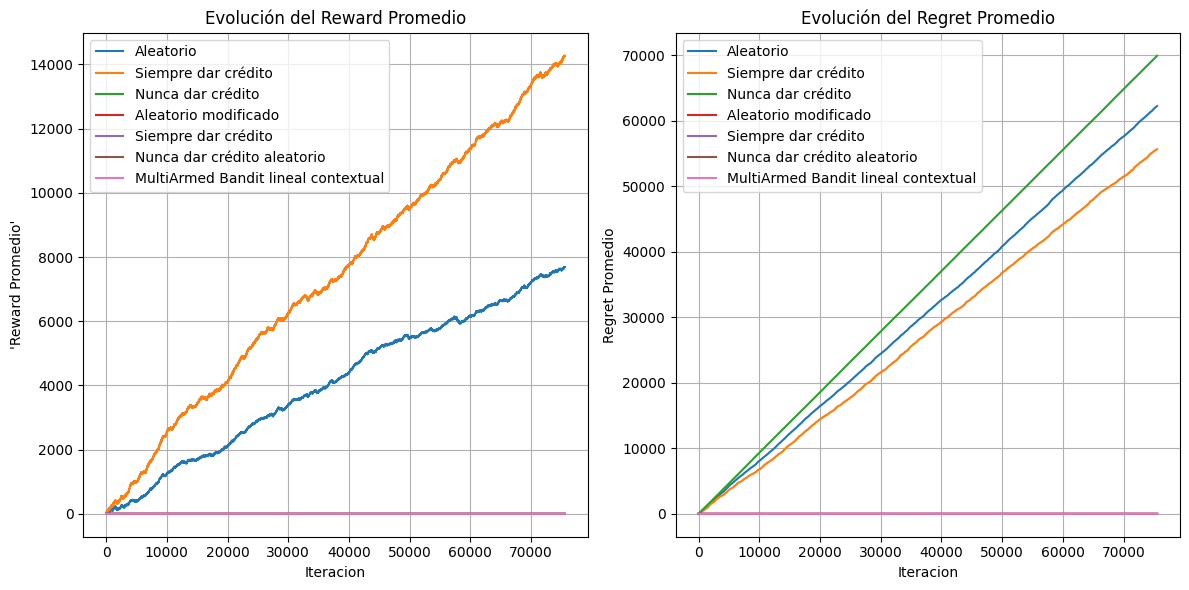

In [ ]:
graficar_evolucion_reward_regret(rewards_aux_norm, regrets_aux_norm, labels)

Sin normalizar:

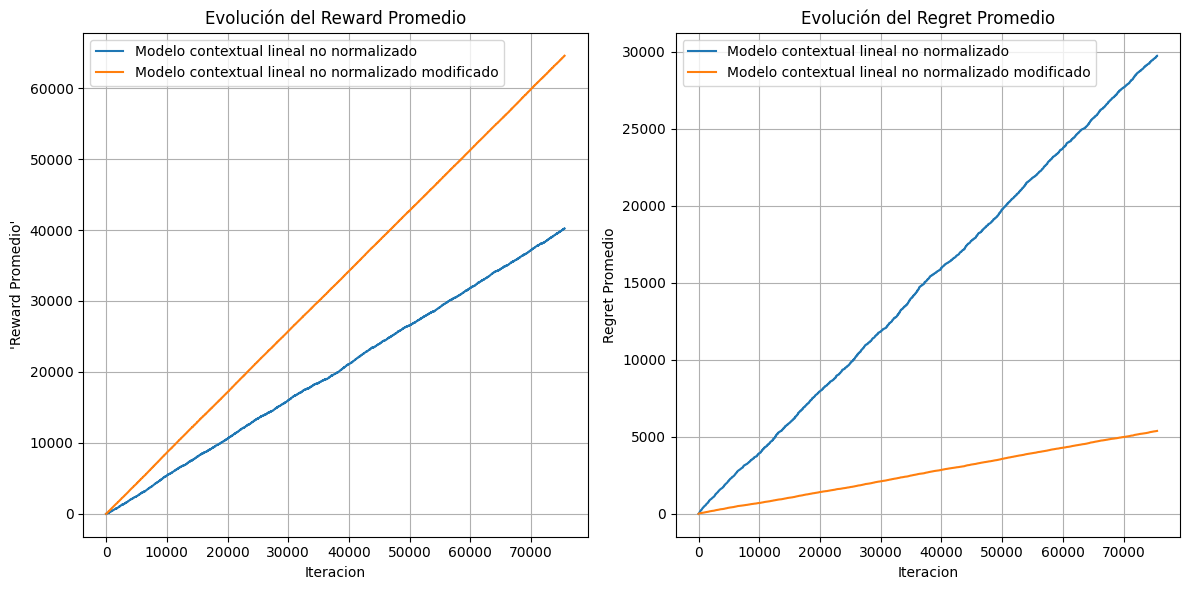

In [ ]:
graficar_evolucion_reward_regret([np.cumsum(rewards_contextual_bandit), np.cumsum(rewards_contextual_bandit_mod)],
                                 [np.cumsum(regrets_contextual_bandit), np.cumsum(regrets_contextual_bandit_mod)], ["Modelo contextual lineal no normalizado", "Modelo contextual lineal no normalizado modificado"])

In [ ]:
rewards_aux_no_norm.append(np.cumsum(rewards_contextual_bandit_mod))
regrets_aux_no_norm.append(np.cumsum(regrets_contextual_bandit_mod))

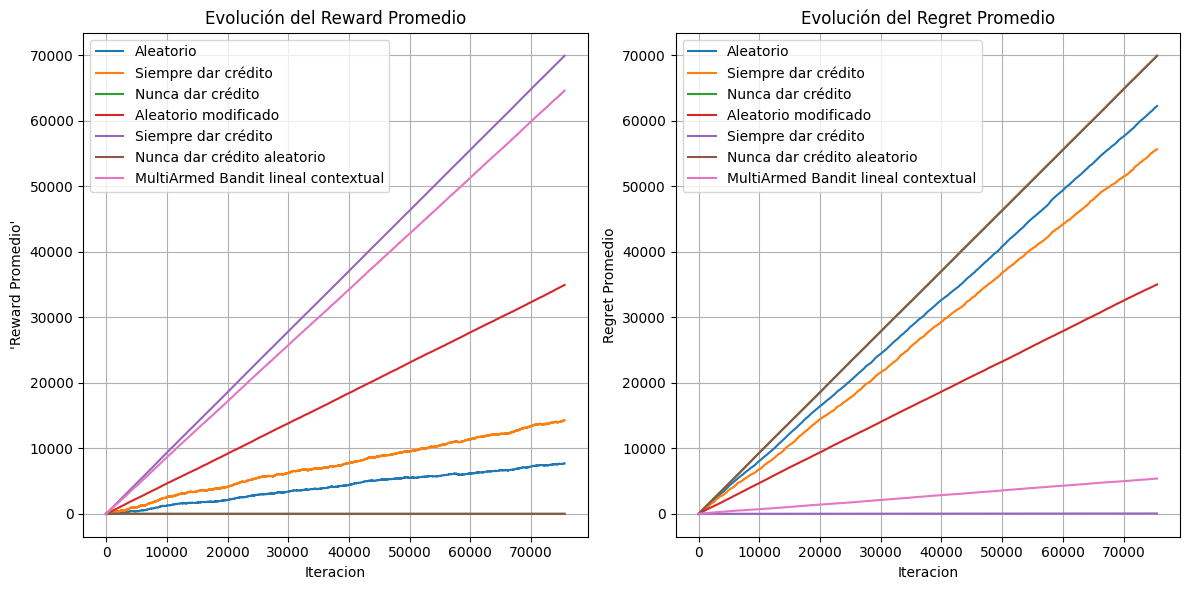

In [ ]:
graficar_evolucion_reward_regret(rewards_aux_no_norm, regrets_aux_no_norm, labels)

Podemos observar que la recompensa por dar el crédito a un cliente con menor penalización ($-1$) es mayor que darle el crédito a un cliente con una penalización mayor ($-10$), lo que confirma las suposiciones anteriormente vistas en este apartado.

### Tarea 8
 **Optimiza tu sistema haciendo selección de variables.**

In [ ]:
# Obtención de variables
variables = df.columns.tolist()
variables

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from graphviz import Source
from sklearn.metrics import accuracy_score

# Cargar el dataset
df = pd.read_csv("./cs.csv")

# Limpieza básica del dataset
df.dropna(inplace=True)
df = df[(df["age"] >= 18) & (df["age"] <= 70)]
df = df[~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98])]
df = df[~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98])]
df = df[~df["NumberOfTimes90DaysLate"].isin([96, 98])]

# Dividir el dataset en entrenamiento y prueba
df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

Accuracy en conjunto de entrenamiento: 0.9262692338250483
Accuracy en conjunto de prueba: 0.926278387146609


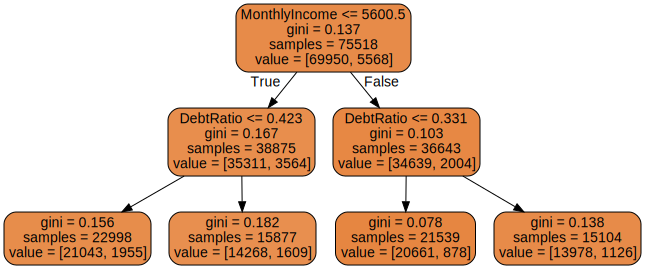

Recomendación para cliente de entrenamiento: 0
Recomendación para cliente de prueba: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
class Clientes:
    def __init__(self, df, variables):
        self.i = -1
        self.df = df[variables]

    def cliente(self):
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0

    def get_context(self):
        return self.df.iloc[self.i]

    def get_reward(self, accion):
        if accion == 0:
            return 0
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1:
            return -10
        return 1

# Definimos las variables que se utilizarán
variables = ['MonthlyIncome', 'DebtRatio']

# Inicializar instancias de clientes para entrenamiento y prueba
cl_train = Clientes(df_train, variables)
cl_test = Clientes(df_test, variables)

# Entrenar el árbol de decisión utilizando solo las variables seleccionadas
clf = DecisionTreeClassifier(min_samples_split=0.3, min_samples_leaf=0.2, max_leaf_nodes=10)
clf.fit(df_train[variables], df_train["SeriousDlqin2yrs"])

# Validación del modelo
y_pred_train = clf.predict(df_train[variables])
y_pred_test = clf.predict(df_test[variables])

accuracy_train = accuracy_score(df_train["SeriousDlqin2yrs"], y_pred_train)
accuracy_test = accuracy_score(df_test["SeriousDlqin2yrs"], y_pred_test)

print("Accuracy en conjunto de entrenamiento:", accuracy_train)
print("Accuracy en conjunto de prueba:", accuracy_test)

# Interpretación del árbol de decisión
display(Source(export_graphviz(clf, out_file=None, feature_names=variables, filled=True, rounded=True)))

# Función para obtener las recomendaciones del árbol de decisión
def get_recommendations(client):
    context = client.get_context().values.reshape(1, -1)
    action = clf.predict(context)[0]
    return action

# Ejemplo de uso para obtener la recomendación para un cliente de entrenamiento
cl_train.cliente()  # Simular llegada de cliente
recommendation_train = get_recommendations(cl_train)
print("Recomendación para cliente de entrenamiento:", recommendation_train)

# Ejemplo de uso para obtener la recomendación para un cliente de prueba
cl_test.cliente()  # Simular llegada de cliente
recommendation_test = get_recommendations(cl_test)
print("Recomendación para cliente de prueba:", recommendation_test)


Se ha cambiado el código para obtener el arbol de recomendaciones según las variables que se desee.

En este caso, podemos observar el árbol generado por las variables `MonthlyIncome` y `DebtRatio` siendo la primera variable la más importante según el diagrama y luego la segunda variable.

La razón por la que se ha elegido esas variables a representar es por intentar obtener un árbol diferente al obtenido en apartados anteriores y comprobar la funcionalidad de los cambios.

### Tarea 9 (Opcional)
**Investiga otras librerías que permitan implementar multiarmed bandits contextuales no lineales. Toma una de ellas y vuelve a realizar la tarea 3. https://github.com/alison-carrera/onn**

In [ ]:
# TODO Investigar librerias multiarmed bandits

In [ ]:
!pip install onn

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import numpy as np
from onn.OnlineNeuralNetwork import ONN_THS
import warnings
warnings.filterwarnings("ignore")


# Función para simular la interacción con clientes y entrenar el multiarmed bandit contextual no lineal
def entrenar_multiarmed_bandit_contextual(clientes, num_iteraciones, bandits_model):
    rewards_totales = []
    regrets_totales = []

    for _ in range(num_iteraciones):

        clientes.cliente()  # Simular la llegada de un nuevo cliente
        contexto = clientes.get_context().values  # Obtener el contexto del cliente

        # Seleccionar acción utilizando el modelo de bandits
        arm_selected, exploration_factor = bandits_model.predict(np.asarray([contexto]))

        # Calcular reward y regret
        reward, regret = calcular_reward_regret(clientes, arm_selected)

        # Registrar el reward y el regret
        rewards_totales.append(reward)
        regrets_totales.append(regret)

        # Entrenar el bandit contextual no lineal
        bandits_model.partial_fit(np.asarray([contexto]), np.asarray([arm_selected]), exploration_factor)

    return rewards_totales, regrets_totales

# Definir el número de acciones y características en el multiarmed bandit
num_actions = 2
num_features = 10

# Crear una instancia de ONN_THS
bandits_model = ONN_THS(features_size=num_features, max_num_hidden_layers=5, qtd_neuron_per_hidden_layer=10, n_classes=num_actions)

# Entrenar el multiarmed bandit contextual no lineal
rewards_contextual_bandit_onn, regrets_contextual_bandit_onn = entrenar_multiarmed_bandit_contextual(cl_train, num_iteraciones, bandits_model)

# Calcular métricas
reward_promedio_contextual_bandit_onn, regret_promedio_contextual_bandit_onn = calcular_promedios_acumulados(rewards_contextual_bandit_onn, regrets_contextual_bandit_onn)


Alpha:[0.04003393 0.04008767 0.04003393 0.4476397  0.43220478]
Training Loss: 2.5886185
Alpha:[0.04061797 0.05538453 0.04070755 0.28036204 0.58292794]
Training Loss: 0.22764951
Alpha:[0.04050979 0.04595195 0.04079696 0.2824531  0.59028816]
Training Loss: 0.20168343
Alpha:[0.04088643 0.04295677 0.04201112 0.2815328  0.59261286]
Training Loss: 0.22541644
Alpha:[0.0400214  0.04113657 0.04063632 0.28503278 0.5931729 ]
Training Loss: 0.19062407
Alpha:[0.04060179 0.04111257 0.04099299 0.28595105 0.5913416 ]
Training Loss: 0.18796448
Alpha:[0.04163267 0.04108127 0.04141184 0.28402078 0.59185344]
Training Loss: 0.2654602
Alpha:[0.04088335 0.04163462 0.04112186 0.28498006 0.5913802 ]
Training Loss: 0.22874346
Alpha:[0.04113923 0.04173081 0.04179747 0.28491127 0.59042114]
Training Loss: 0.19372585
Alpha:[0.0409774  0.04224007 0.04229704 0.28486145 0.58962405]
Training Loss: 0.21292862
Alpha:[0.04141212 0.04156629 0.0417106  0.2862169  0.58909404]
Training Loss: 0.21705972
Alpha:[0.04145983 0.042

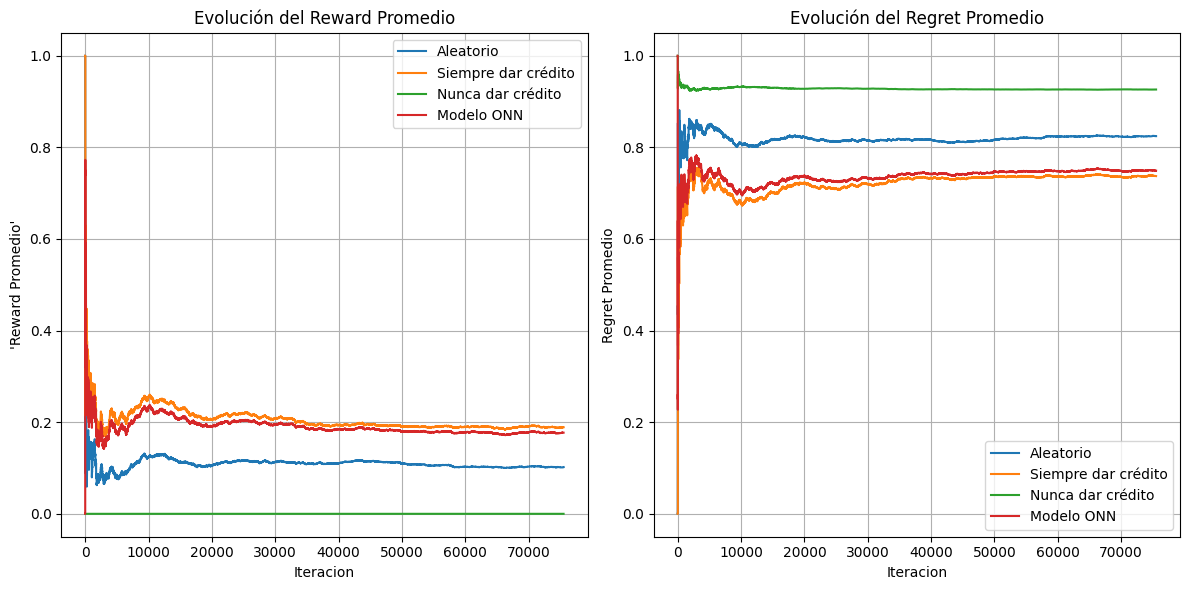

In [ ]:
# Graficar
graficar_evolucion_reward_regret([reward_promedio_aleatorio,reward_promedio_dar_credito,reward_promedio_no_dar_credito,reward_promedio_contextual_bandit_onn],
                                 [regret_promedio_aleatorio,regret_promedio_dar_credito,regret_promedio_no_dar_credito,regret_promedio_contextual_bandit_onn],
                                 ["Aleatorio", "Siempre dar crédito", "Nunca dar crédito","Modelo ONN"])

Podemos observar que con el modelo ONN se obtiene un resultado parecido al modelo que se usó en la tarea 1 que consiste en dar siempre crédito. Esto parece indicar que el sistema será más propenso a conceder un préstamo que a denegarlo.